<a href="https://colab.research.google.com/github/atxtori/ActionsExercise/blob/main/AJordan_MT_Project_LearnerNotebook_LowCode_FinalWk3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models.
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [6]:
# Installing the libraries with the specified version.
!pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 imbalanced-learn==0.10.1 xgboost==2.0.3 threadpoolctl==3.3.0 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 78.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 72.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 5.0 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 24.12.0 requires pandas<2.2.4dev0,>=2.0, but you ha

**Note:** After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.

In [7]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [8]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
df = pd.read_csv('/content/drive/My Drive/Model Tuning/Train.csv') ##  Complete the code to read the training data
df_test = pd.read_csv('/content/drive/My Drive/Model Tuning/Test.csv') ##  Complete the code to read the test data

## Data Overview

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [10]:
# Checking the number of rows and columns in the training data
df.shape ##  Complete the code to view dimensions of the train data

(20000, 41)

In [11]:
# Checking the number of rows and columns in the test data
df_test.shape ##  Complete the code to view dimensions of the test data

(5000, 41)

In [12]:
# let's create a copy of the training data
data = df.copy()

In [13]:
# let's create a copy of the training data
data_test = df_test.copy()

### Displaying the first few rows of the dataset

In [14]:
# let's view the first 5 rows of the data
data.head() ##  Complete the code to view top 5 rows of the data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.465,-4.679,3.102,0.506,-0.221,-2.033,-2.911,0.051,-1.522,3.762,-5.715,0.736,0.981,1.418,-3.376,-3.047,0.306,2.914,2.270,4.395,-2.388,0.646,-1.191,3.133,0.665,-2.511,-0.037,0.726,-3.982,-1.073,1.667,3.060,-1.690,2.846,2.235,6.667,0.444,-2.369,2.951,-3.480,0
1,3.366,3.653,0.910,-1.368,0.332,2.359,0.733,-4.332,0.566,-0.101,1.914,-0.951,-1.255,-2.707,0.193,-4.769,-2.205,0.908,0.757,-5.834,-3.065,1.597,-1.757,1.766,-0.267,3.625,1.500,-0.586,0.783,-0.201,0.025,-1.795,3.033,-2.468,1.895,-2.298,-1.731,5.909,-0.386,0.616,0
2,-3.832,-5.824,0.634,-2.419,-1.774,1.017,-2.099,-3.173,-2.082,5.393,-0.771,1.107,1.144,0.943,-3.164,-4.248,-4.039,3.689,3.311,1.059,-2.143,1.650,-1.661,1.680,-0.451,-4.551,3.739,1.134,-2.034,0.841,-1.600,-0.257,0.804,4.086,2.292,5.361,0.352,2.940,3.839,-4.309,0
3,1.618,1.888,7.046,-1.147,0.083,-1.530,0.207,-2.494,0.345,2.119,-3.053,0.460,2.705,-0.636,-0.454,-3.174,-3.404,-1.282,1.582,-1.952,-3.517,-1.206,-5.628,-1.818,2.124,5.295,4.748,-2.309,-3.963,-6.029,4.949,-3.584,-2.577,1.364,0.623,5.550,-1.527,0.139,3.101,-1.277,0
4,-0.111,3.872,-3.758,-2.983,3.793,0.545,0.205,4.849,-1.855,-6.220,1.998,4.724,0.709,-1.989,-2.633,4.184,2.245,3.734,-6.313,-5.380,-0.887,2.062,9.446,4.490,-3.945,4.582,-8.780,-3.383,5.107,6.788,2.044,8.266,6.629,-10.069,1.223,-3.230,1.687,-2.164,-3.645,6.510,0


In [15]:
# let's view the last 5 rows of the data
data_test.tail() ##  Complete the code to view last 5 rows of the data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
4995,-5.120,1.635,1.251,4.036,3.291,-2.932,-1.329,1.754,-2.985,1.249,-6.878,3.715,-2.512,-1.395,-2.554,-2.197,4.772,2.403,3.792,0.487,-2.028,1.778,3.668,11.375,-1.977,2.252,-7.319,1.907,-3.734,-0.012,2.120,9.979,0.063,0.217,3.036,2.109,-0.557,1.939,0.513,-2.694,0
4996,-5.172,1.172,1.579,1.220,2.530,-0.669,-2.618,-2.001,0.634,-0.579,-3.671,0.460,3.321,-1.075,-7.113,-4.356,-0.001,3.698,-0.846,-0.222,-3.645,0.736,0.926,3.278,-2.277,4.458,-4.543,-1.348,-1.779,0.352,-0.214,4.424,2.604,-2.152,0.917,2.157,0.467,0.470,2.197,-2.377,0
4997,-1.114,-0.404,-1.765,-5.879,3.572,3.711,-2.483,-0.308,-0.922,-2.999,-0.112,-1.977,-1.623,-0.945,-2.735,-0.813,0.610,8.149,-9.199,-3.872,-0.296,1.468,2.884,2.792,-1.136,1.198,-4.342,-2.869,4.124,4.197,3.471,3.792,7.482,-10.061,-0.387,1.849,1.818,-1.246,-1.261,7.475,0
4998,-1.703,0.615,6.221,-0.104,0.956,-3.279,-1.634,-0.104,1.388,-1.066,-7.970,2.262,3.134,-0.486,-3.498,-4.562,3.136,2.536,-0.792,4.398,-4.073,-0.038,-2.371,-1.542,2.908,3.215,-0.169,-1.541,-4.724,-5.525,1.668,-4.100,-5.949,0.550,-1.574,6.824,2.139,-4.036,3.436,0.579,0
4999,-0.604,0.960,-0.721,8.230,-1.816,-2.276,-2.575,-1.041,4.130,-2.731,-3.292,-1.674,0.465,-1.646,-5.263,-7.988,6.480,0.226,4.963,6.752,-6.306,3.271,1.897,3.271,-0.637,-0.925,-6.759,2.990,-0.814,3.499,-8.435,2.370,-1.062,0.791,4.952,-7.441,-0.070,-0.918,-2.291,-5.363,0


### Checking the data types of the columns for the dataset

In [16]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

### Checking for duplicate values

In [17]:
# let's check for duplicate values in the data
data.duplicated().sum()
 ##  Complete the code to check duplicate entries in the data

0

### Checking for missing values

In [18]:
# let's check for missing values in the data
data.isnull().sum() ##  Complete the code to check missing entries in the train data

,0
V1,18
V2,18
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


In [19]:
# let's check for missing values in the data
data_test.isnull().sum() ##  Complete the code to check missing entries in the test data

,0
V1,5
V2,6
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


### Statistical summary of the dataset

In [20]:
# let's view the statistical summary of the numerical columns in the training data
data.describe() ##  Complete the code to print the statitical summary of the train data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
count,19982.000,19982.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000
mean,-0.272,0.440,2.485,-0.083,-0.054,-0.995,-0.879,-0.548,-0.017,-0.013,-1.895,1.605,1.580,-0.951,-2.415,-2.925,-0.134,1.189,1.182,0.024,-3.611,0.952,-0.366,1.134,-0.002,1.874,-0.612,-0.883,-0.986,-0.016,0.487,0.304,0.050,-0.463,2.230,1.515,0.011,-0.344,0.891,-0.876,0.056
std,3.442,3.151,3.389,3.432,2.105,2.041,1.762,3.296,2.161,2.193,3.124,2.930,2.875,1.790,3.355,4.222,3.345,2.592,3.397,3.669,3.568,1.652,4.032,3.912,2.017,3.435,4.369,1.918,2.684,3.005,3.461,5.500,3.575,3.184,2.937,3.801,1.788,3.948,1.753,3.012,0.229
min,-11.876,-12.320,-10.708,-15.082,-8.603,-10.227,-7.950,-15.658,-8.596,-9.854,-14.832,-12.948,-13.228,-7.739,-16.417,-20.374,-14.091,-11.644,-13.492,-13.923,-17.956,-10.122,-14.866,-16.387,-8.228,-11.834,-14.905,-9.269,-12.579,-14.796,-13.723,-19.877,-16.898,-17.985,-15.350,-14.833,-5.478,-17.375,-6.439,-11.024,0.000
25%,-2.737,-1.641,0.207,-2.348,-1.536,-2.347,-2.031,-2.643,-1.495,-1.411,-3.922,-0.397,-0.224,-2.171,-4.415,-5.634,-2.216,-0.404,-1.050,-2.433,-5.930,-0.118,-3.099,-1.468,-1.365,-0.338,-3.652,-2.171,-2.787,-1.867,-1.818,-3.420,-2.243,-2.137,0.336,-0.944,-1.256,-2.988,-0.272,-2.940,0.000
50%,-0.748,0.472,2.256,-0.135,-0.102,-1.001,-0.917,-0.389,-0.068,0.101,-1.921,1.508,1.637,-0.957,-2.383,-2.683,-0.015,0.883,1.279,0.033,-3.533,0.975,-0.262,0.969,0.025,1.951,-0.885,-0.891,-1.176,0.184,0.490,0.052,-0.066,-0.255,2.099,1.567,-0.128,-0.317,0.919,-0.921,0.000
75%,1.840,2.544,4.566,2.131,1.340,0.380,0.224,1.723,1.409,1.477,0.119,3.571,3.460,0.271,-0.359,-0.095,2.069,2.572,3.493,2.512,-1.266,2.026,2.452,3.546,1.397,4.130,2.189,0.376,0.630,2.036,2.731,3.762,2.255,1.437,4.064,3.984,1.176,2.279,2.058,1.120,0.000
max,15.493,13.089,17.091,13.236,8.134,6.976,8.006,11.679,8.138,8.108,11.826,15.081,15.420,5.671,12.246,13.583,16.756,13.180,13.238,16.052,13.840,7.410,14.459,17.163,8.223,16.836,17.560,6.528,10.722,12.506,17.255,23.633,16.692,14.358,15.291,19.330,7.467,15.290,7.760,10.654,1.000


## Exploratory Data Analysis

### Univariate analysis

In [21]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Plotting histograms and boxplots for all the variables

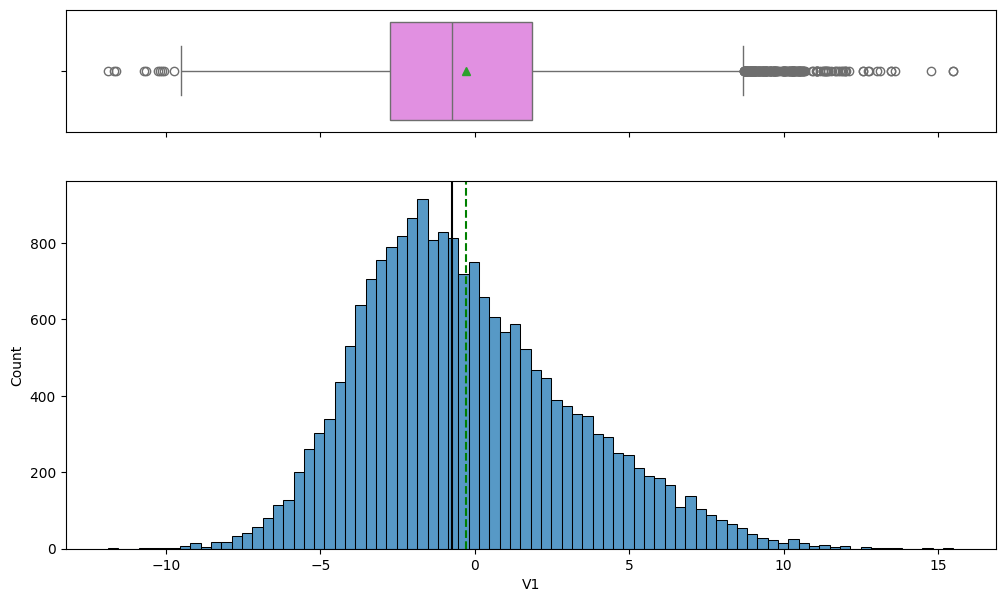

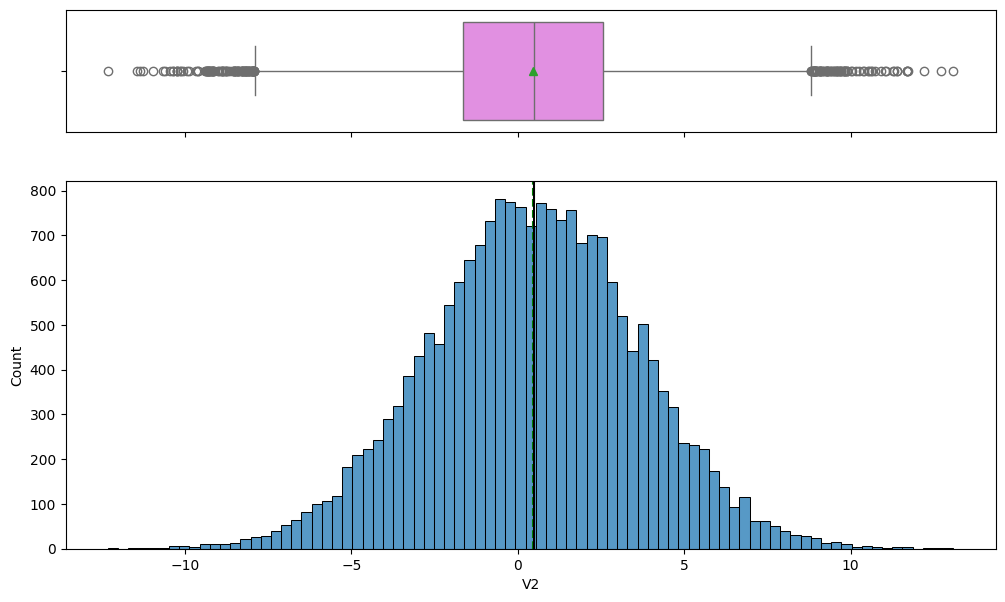

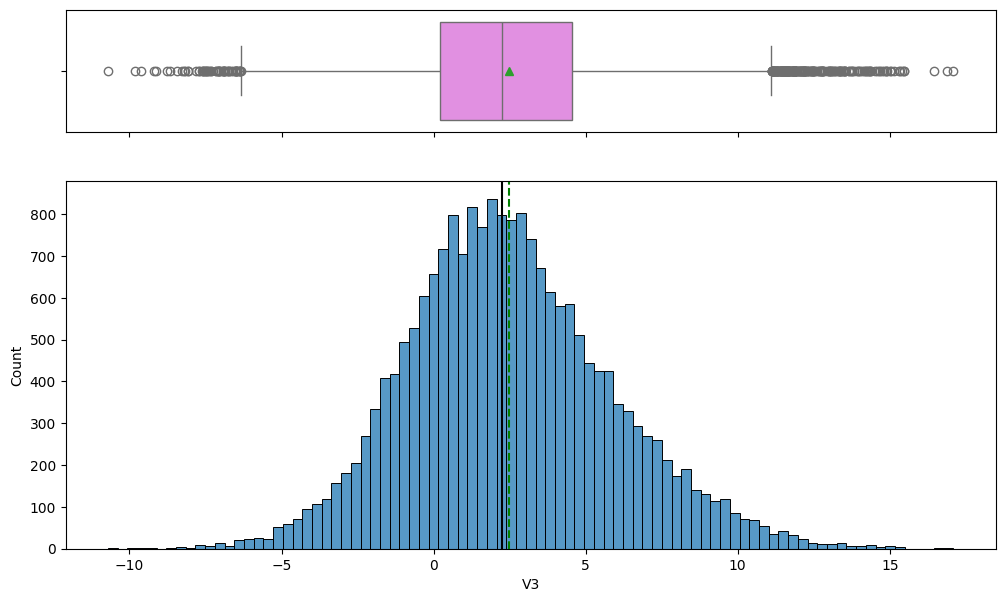

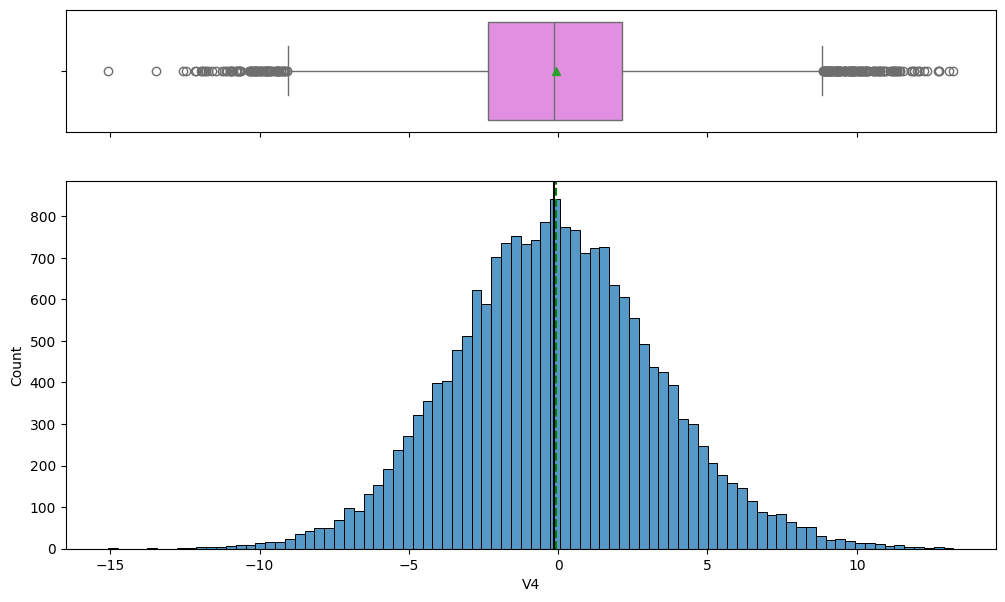

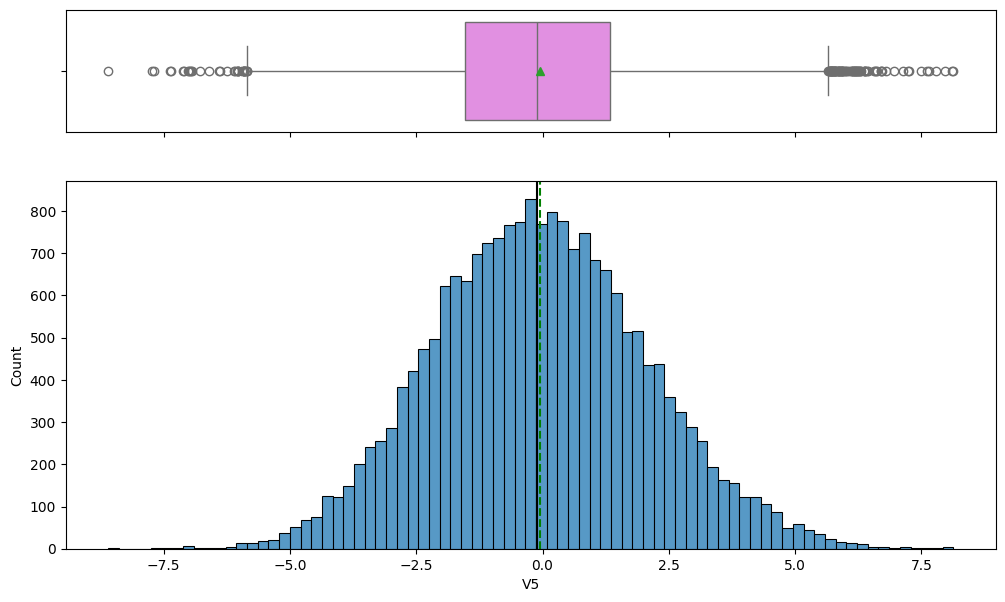

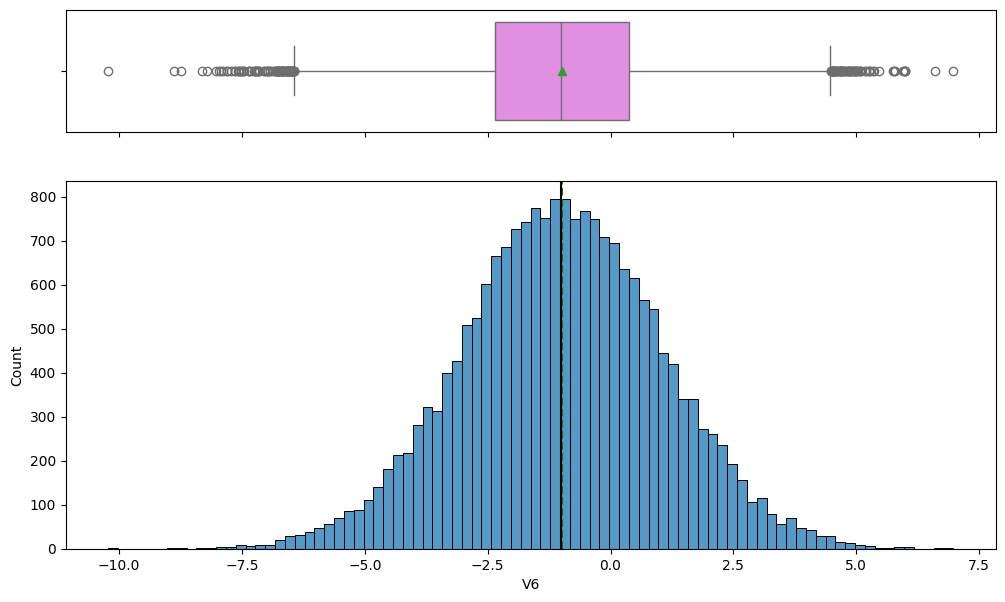

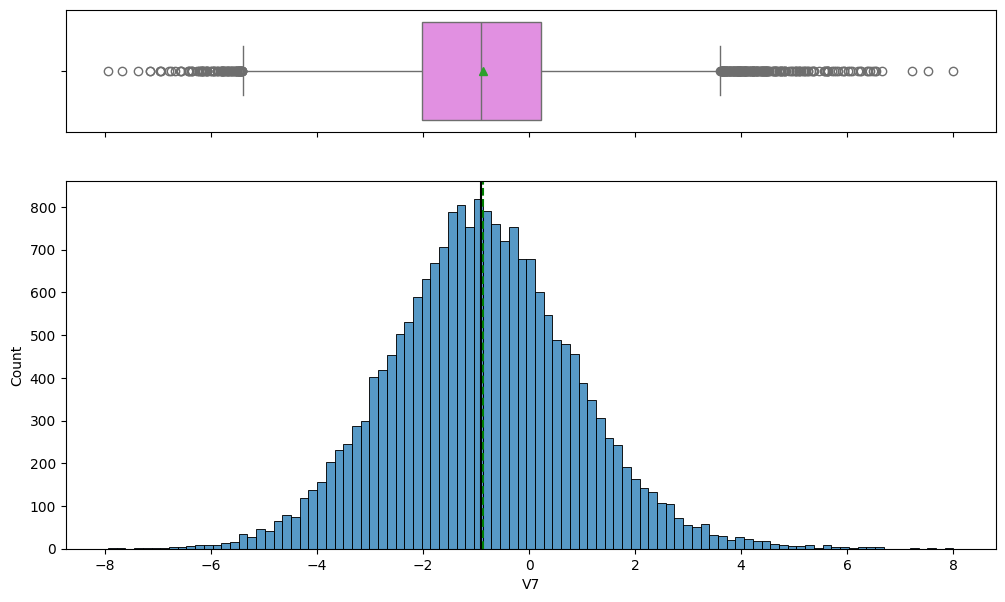

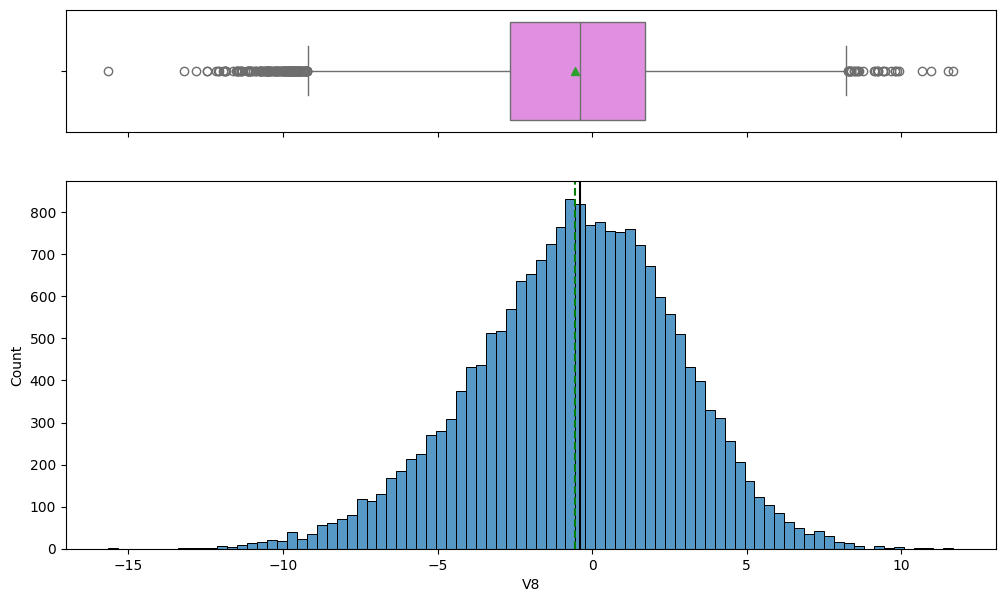

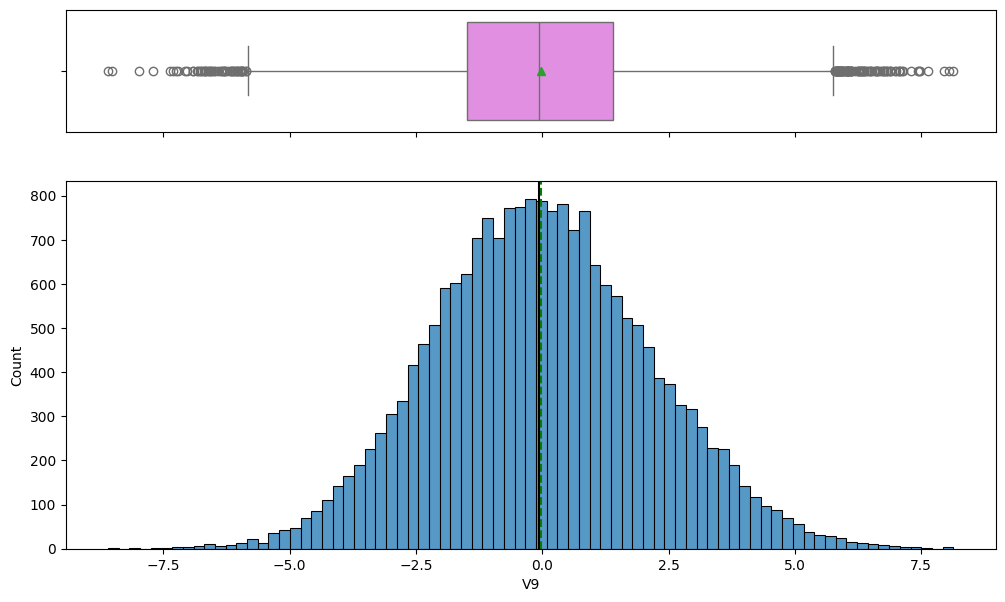

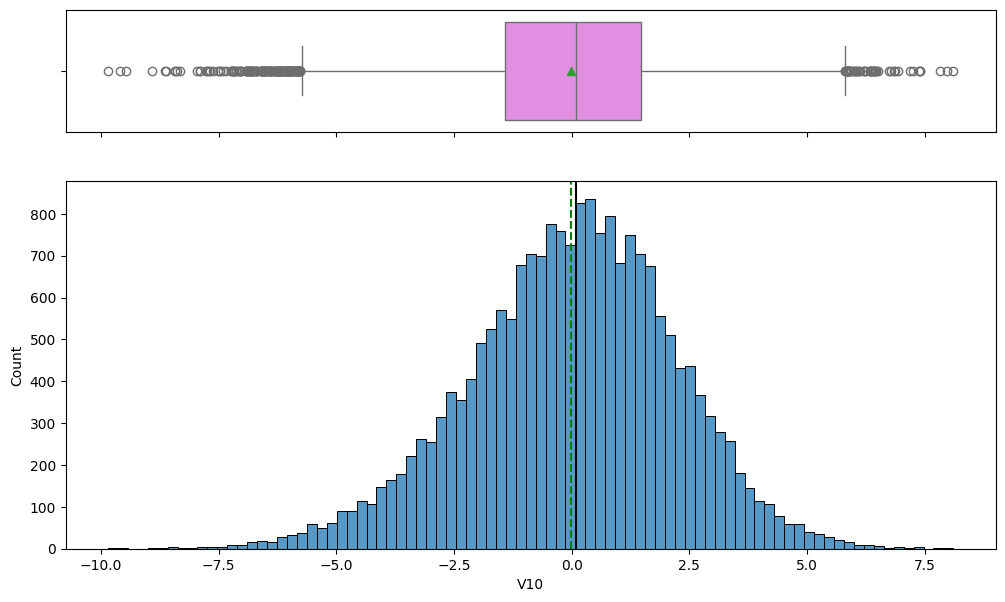

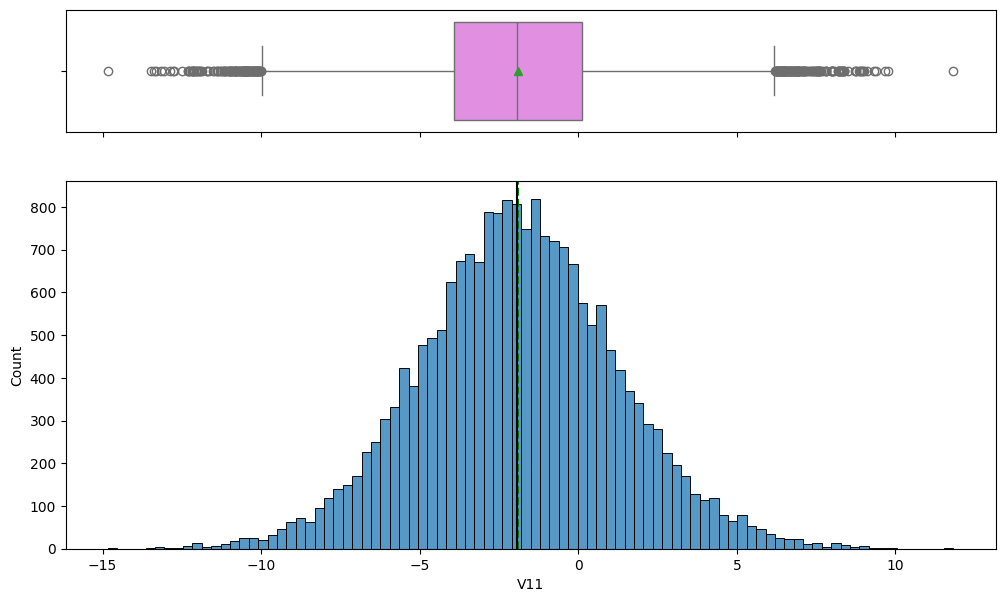

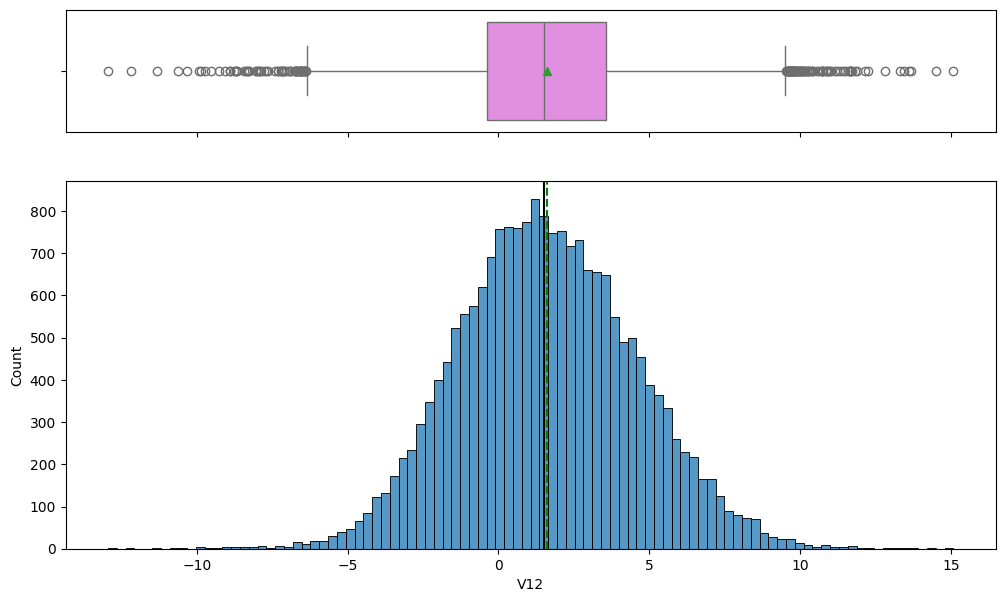

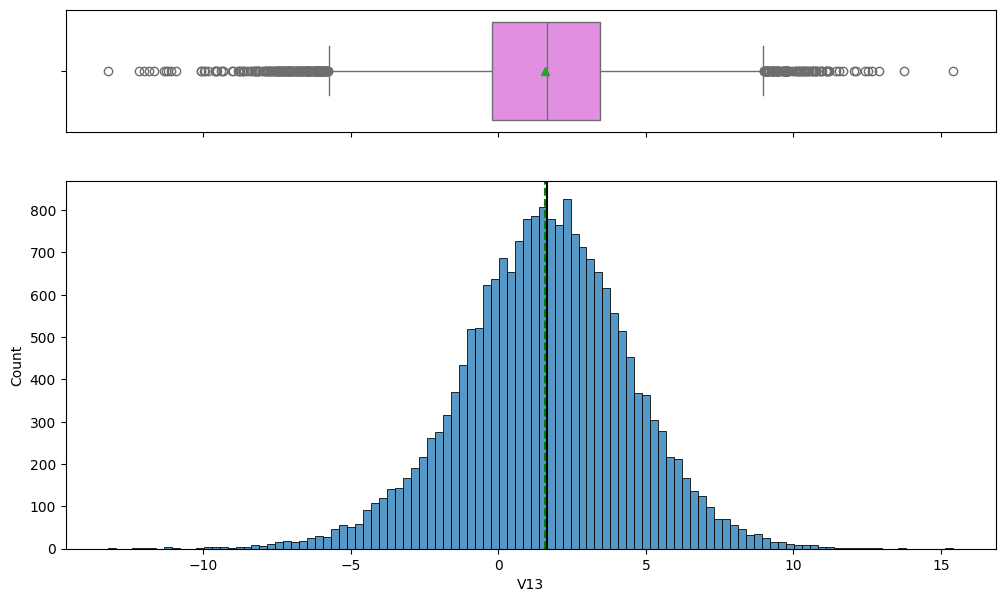

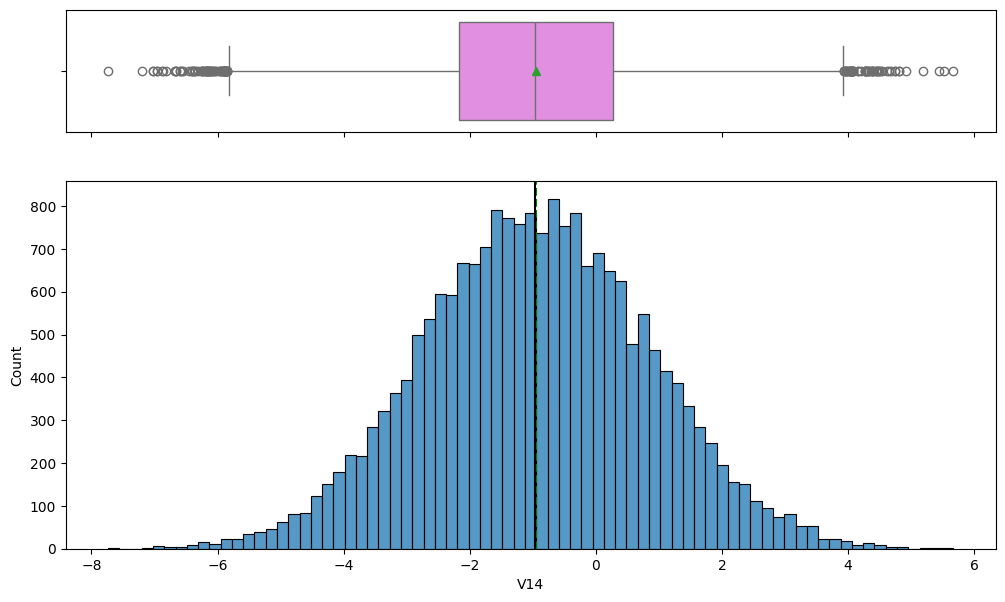

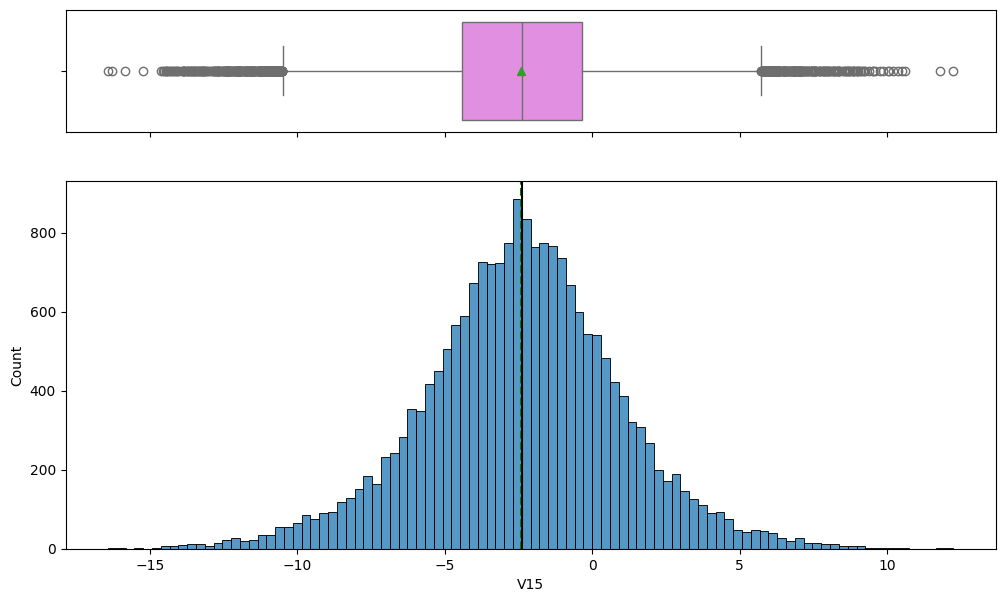

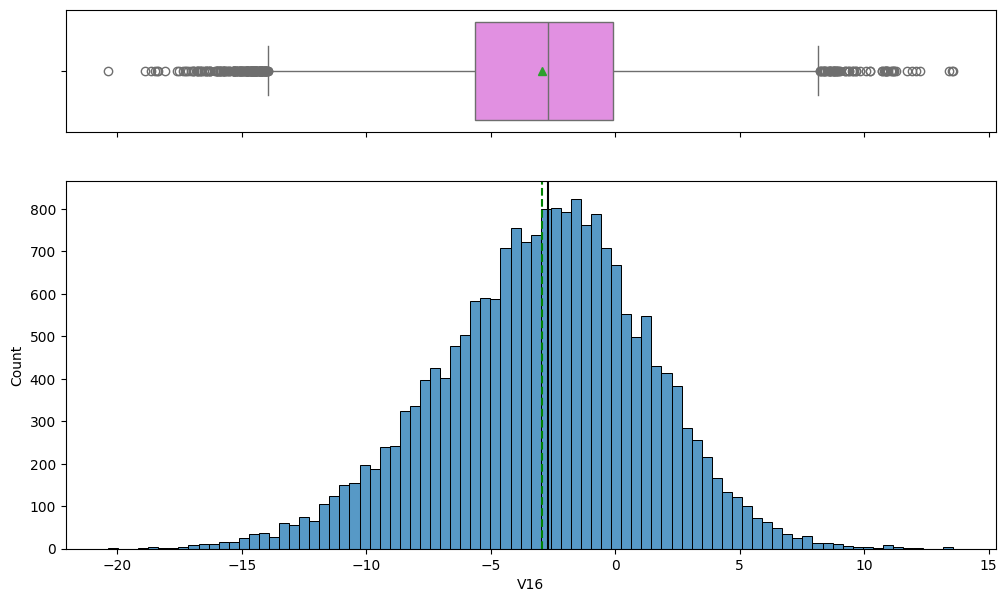

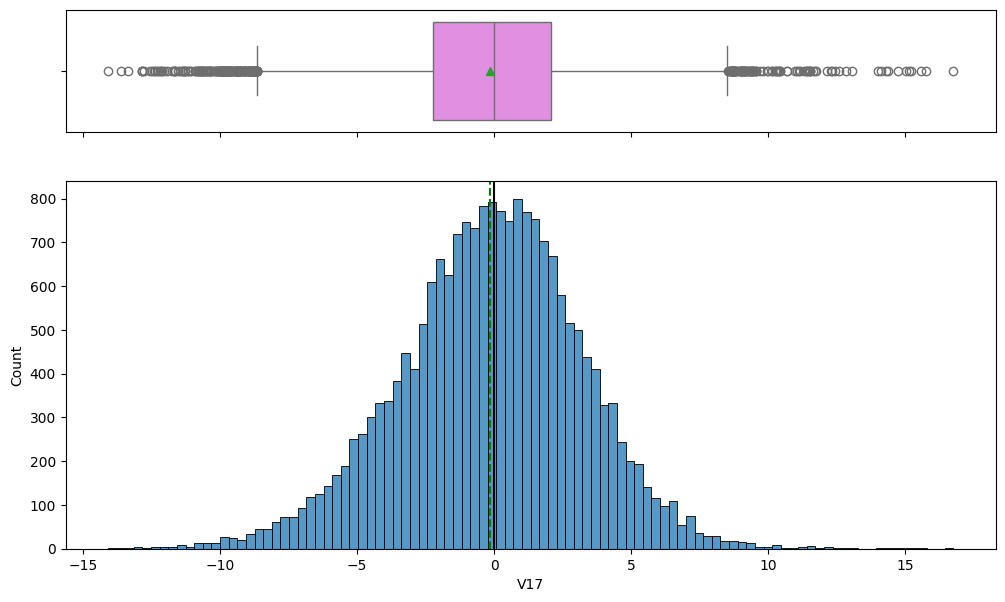

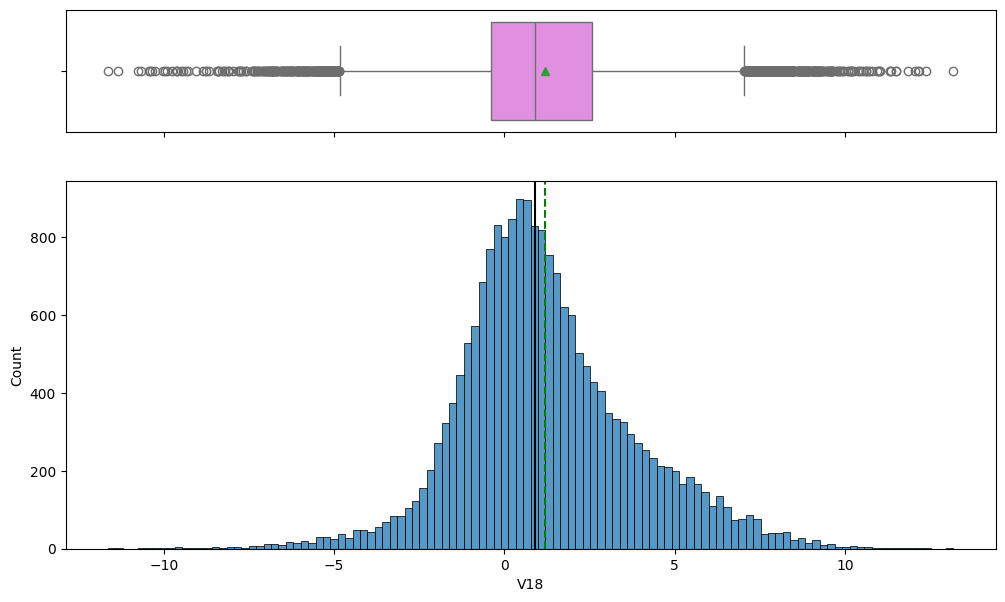

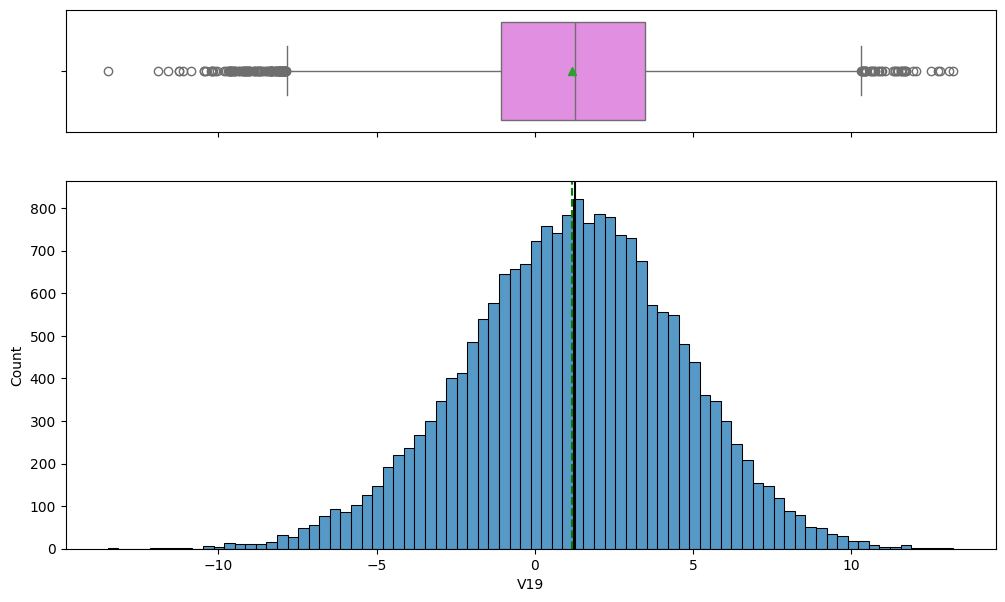

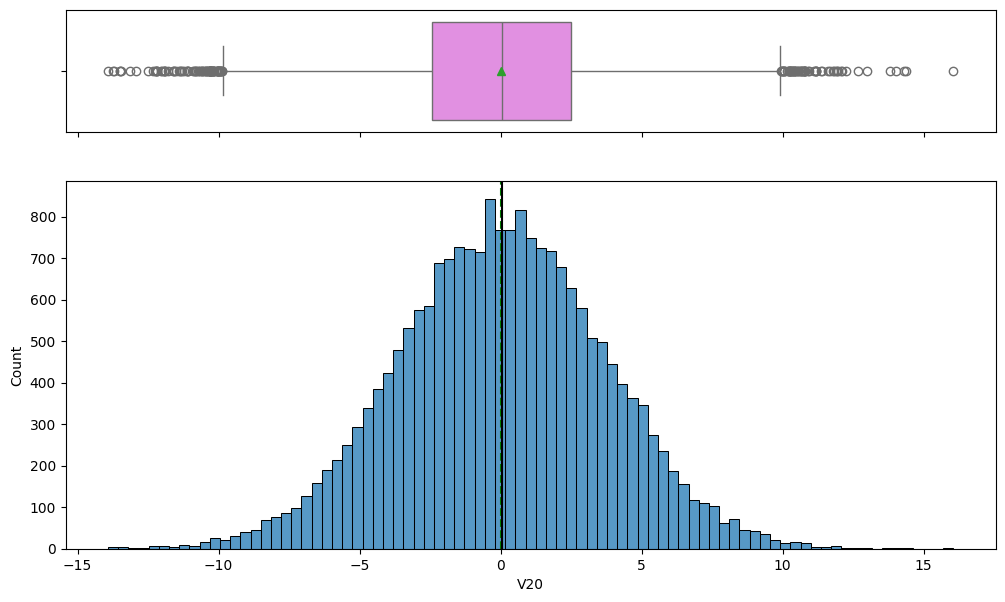

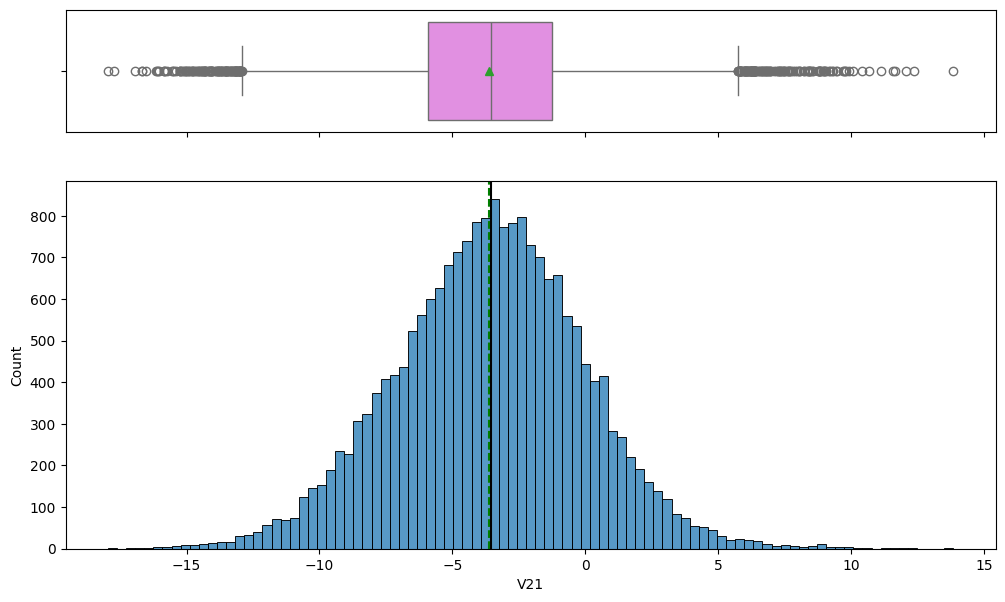

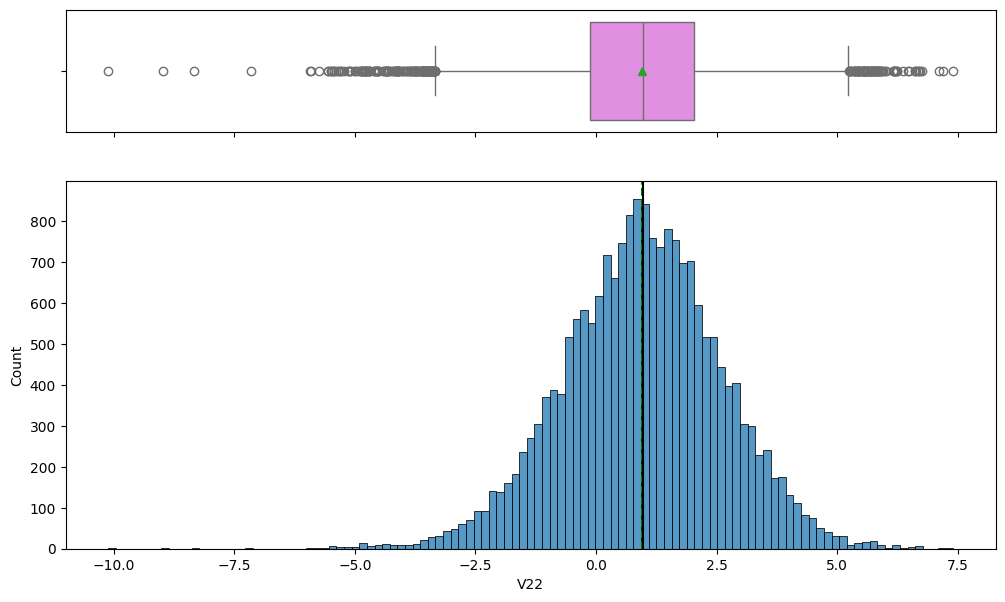

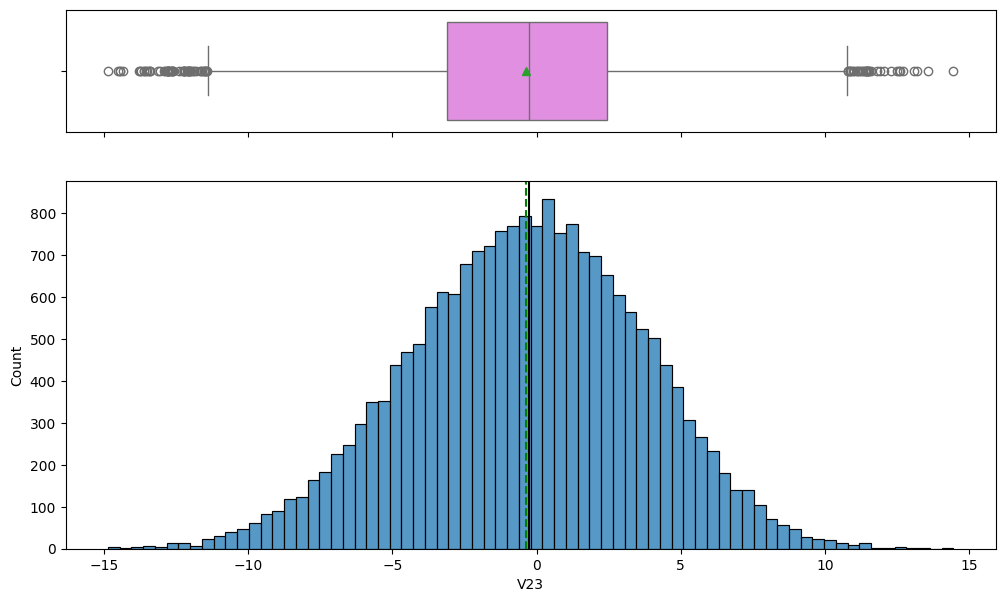

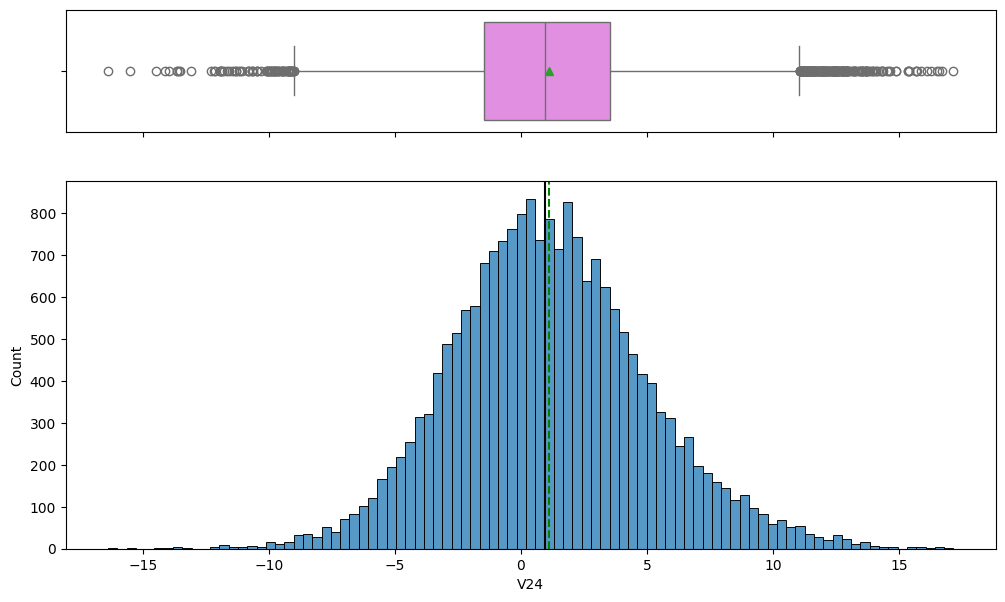

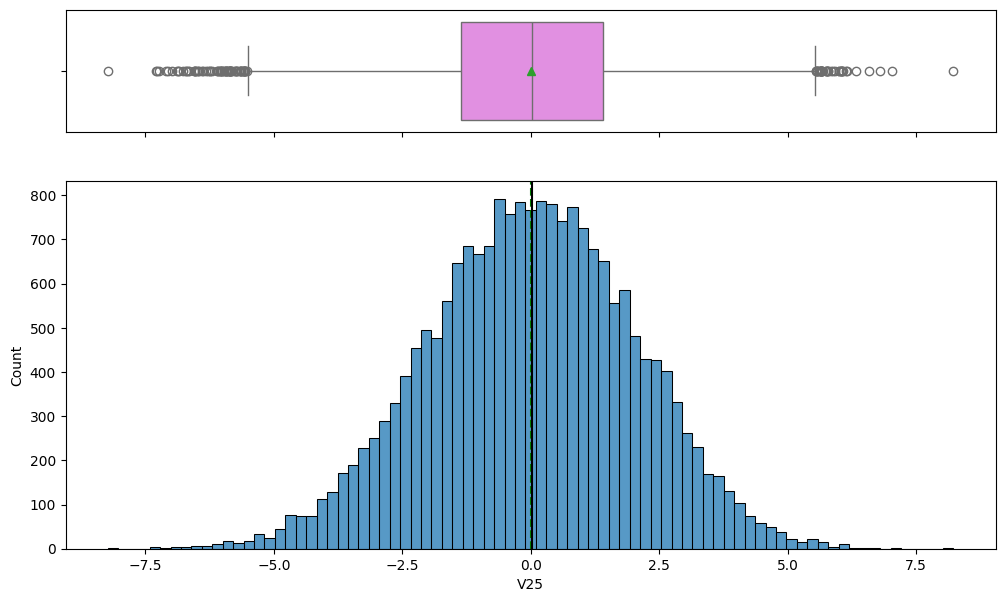

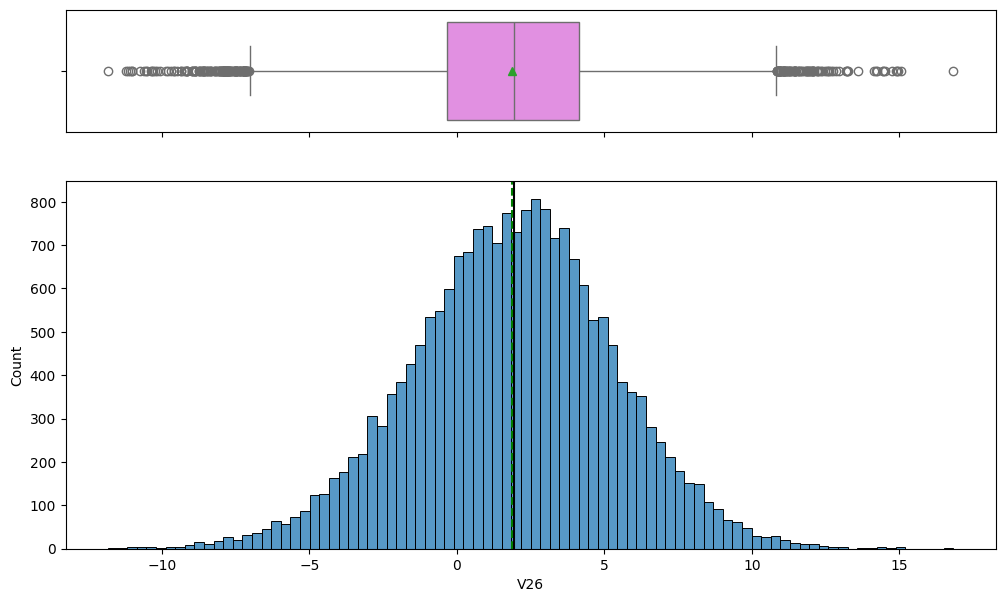

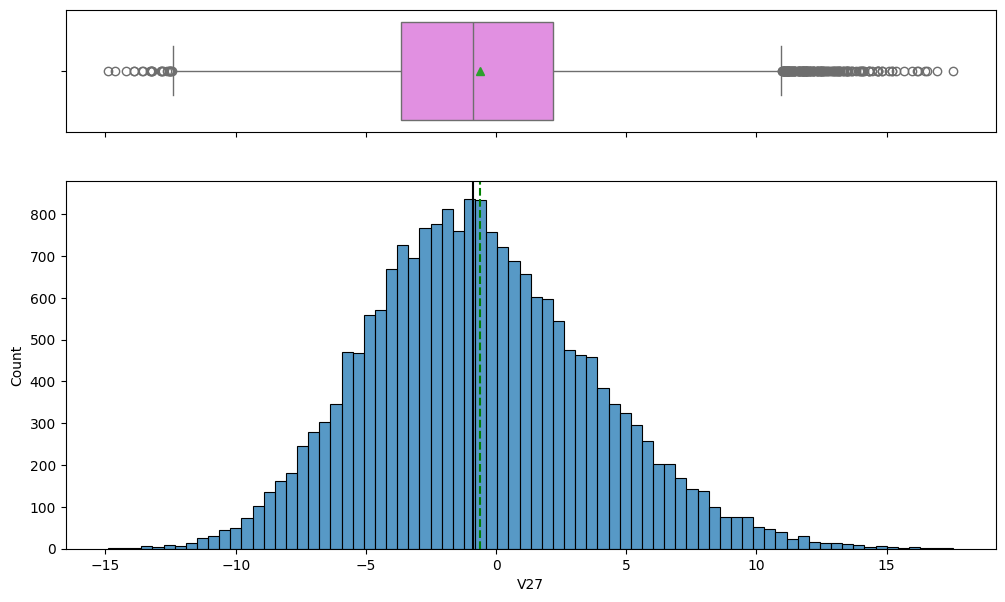

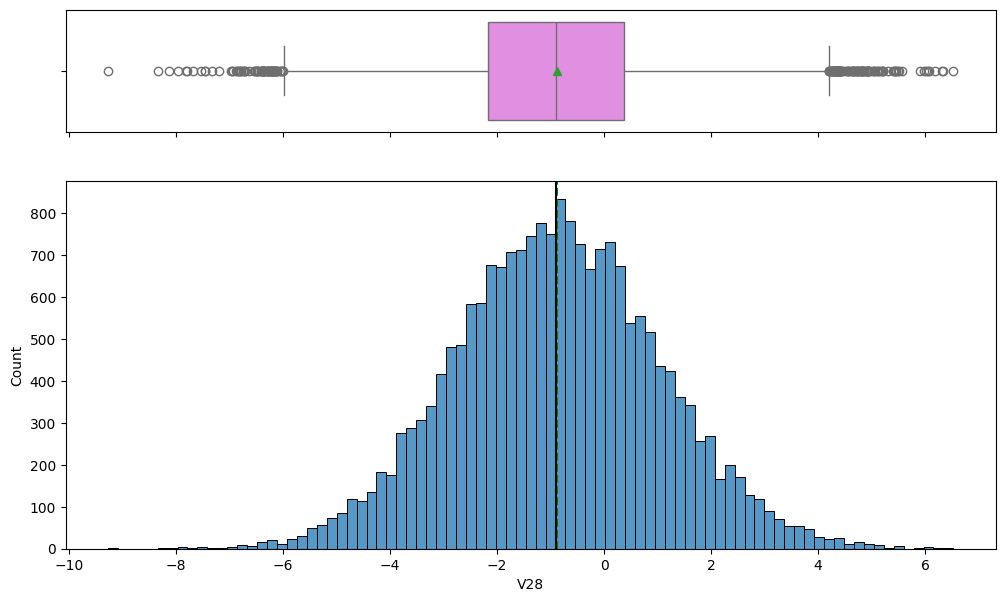

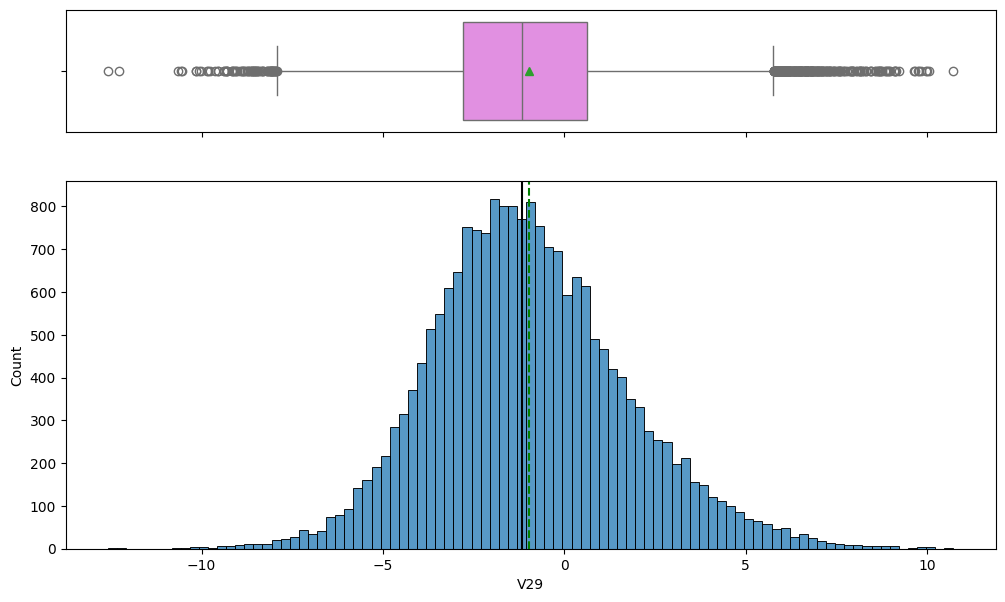

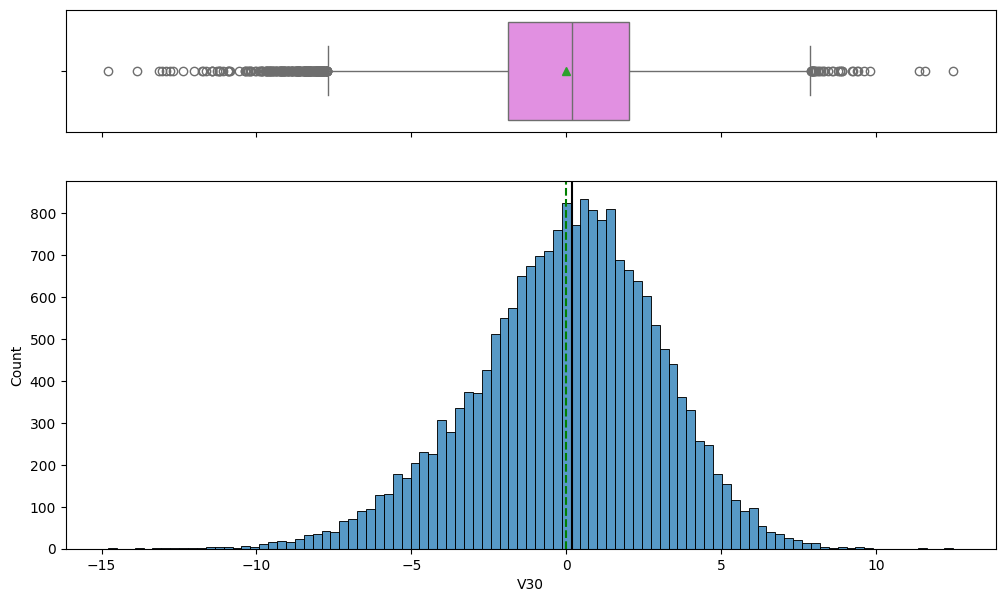

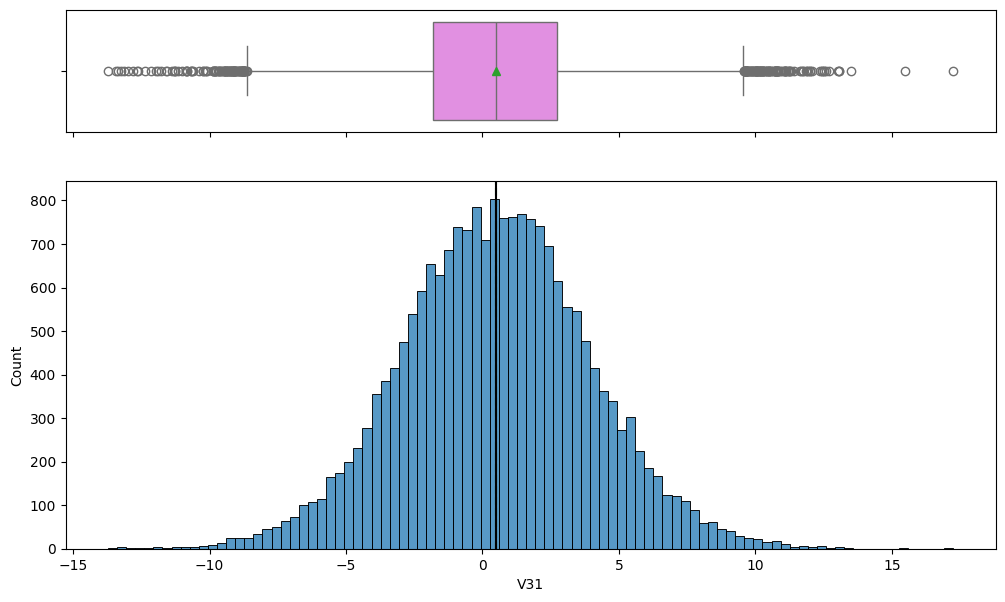

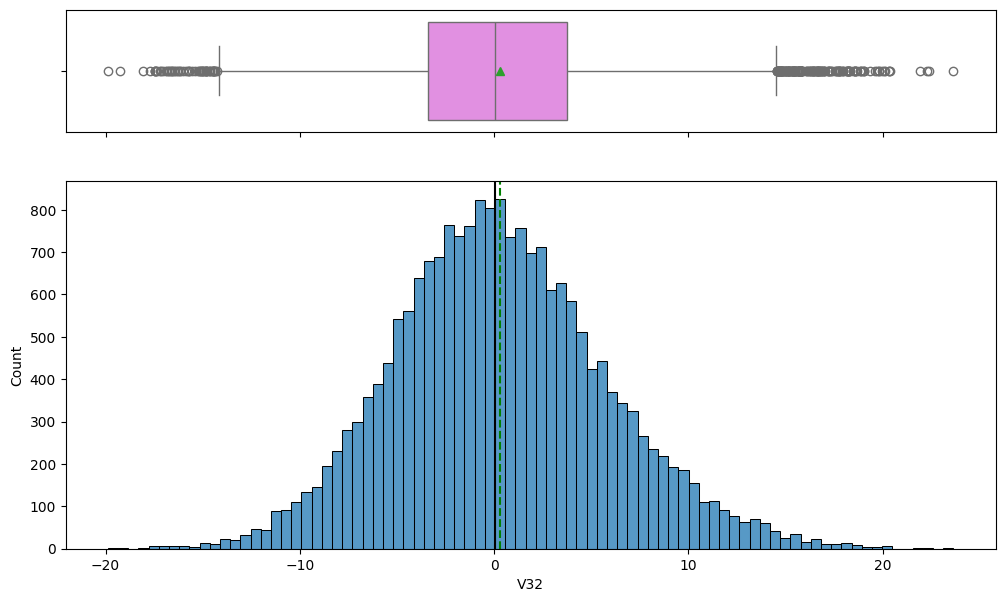

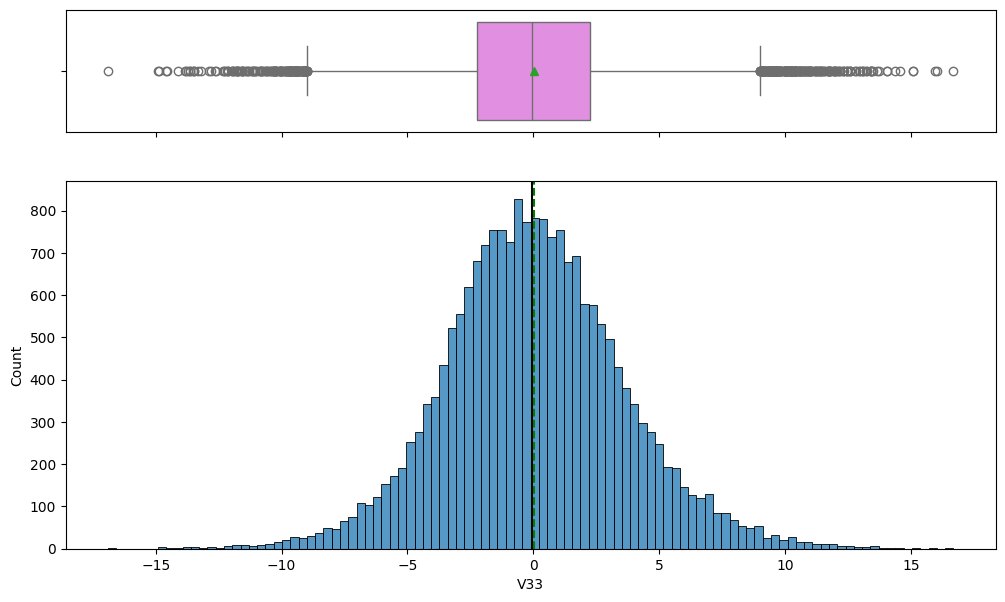

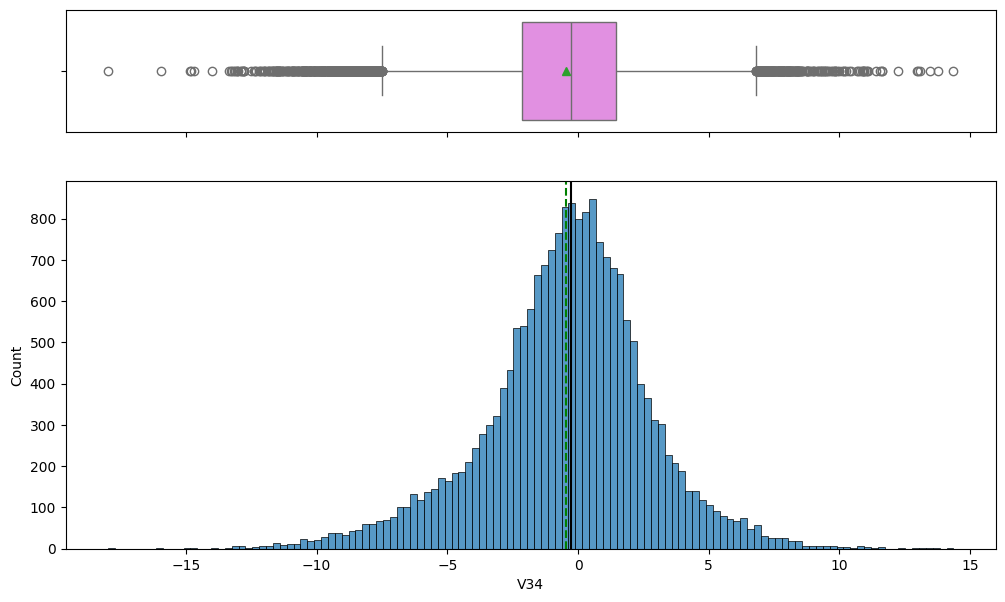

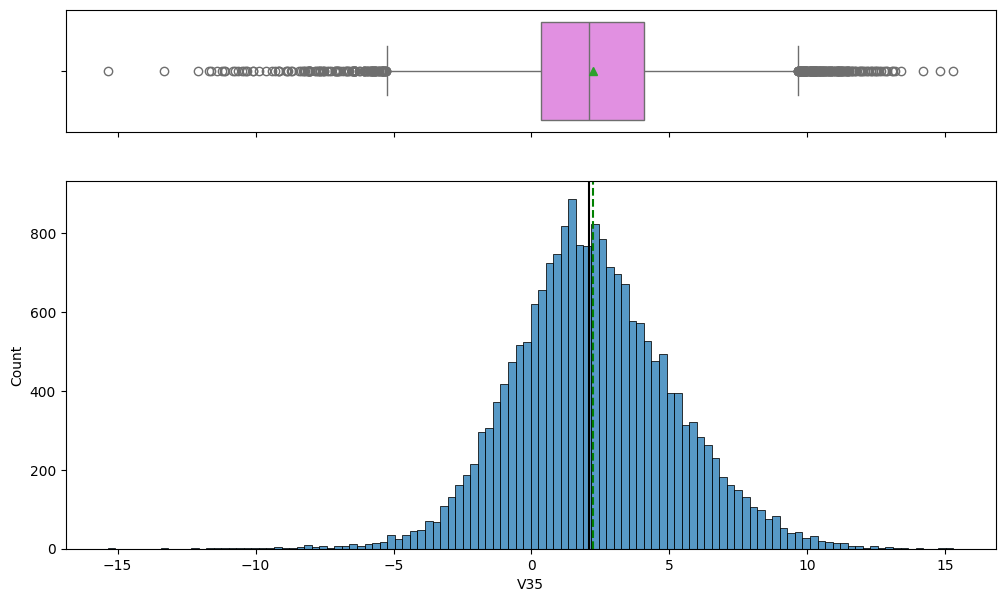

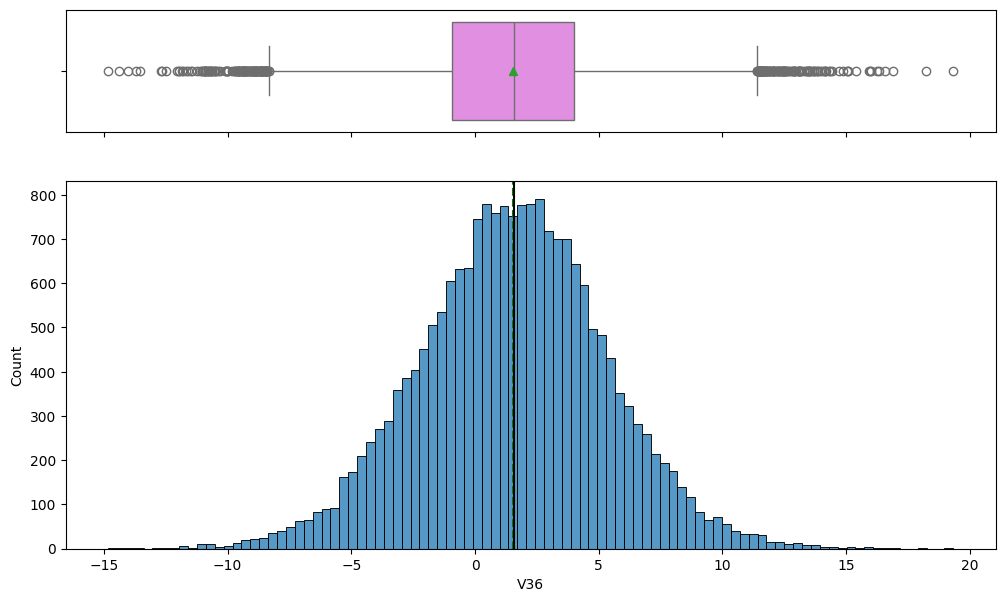

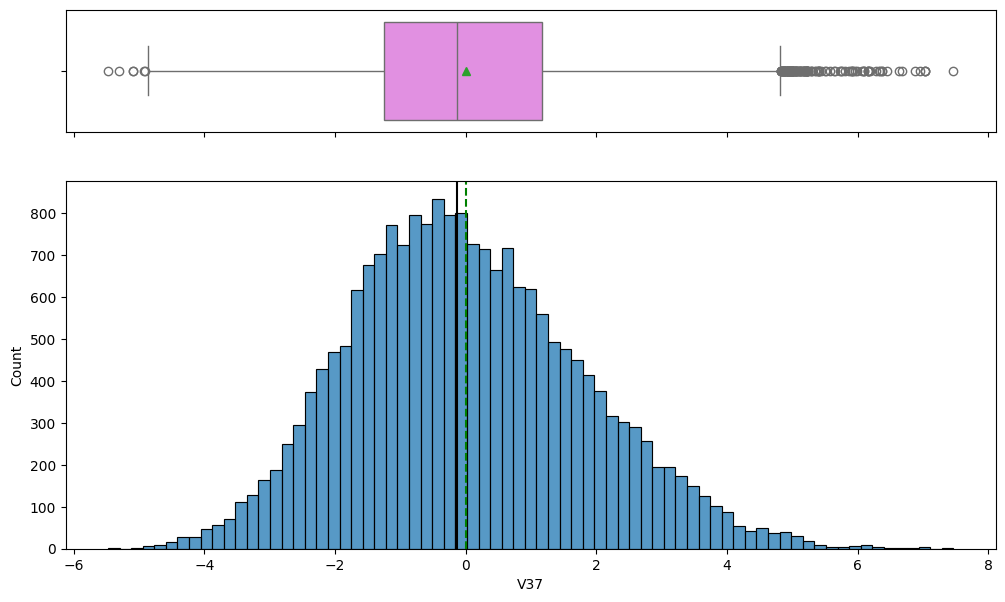

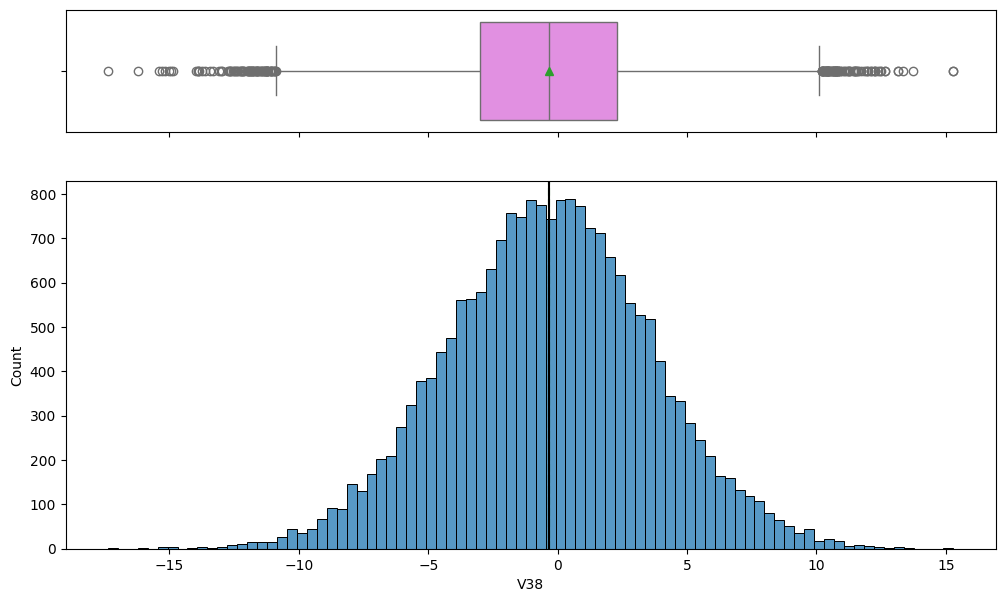

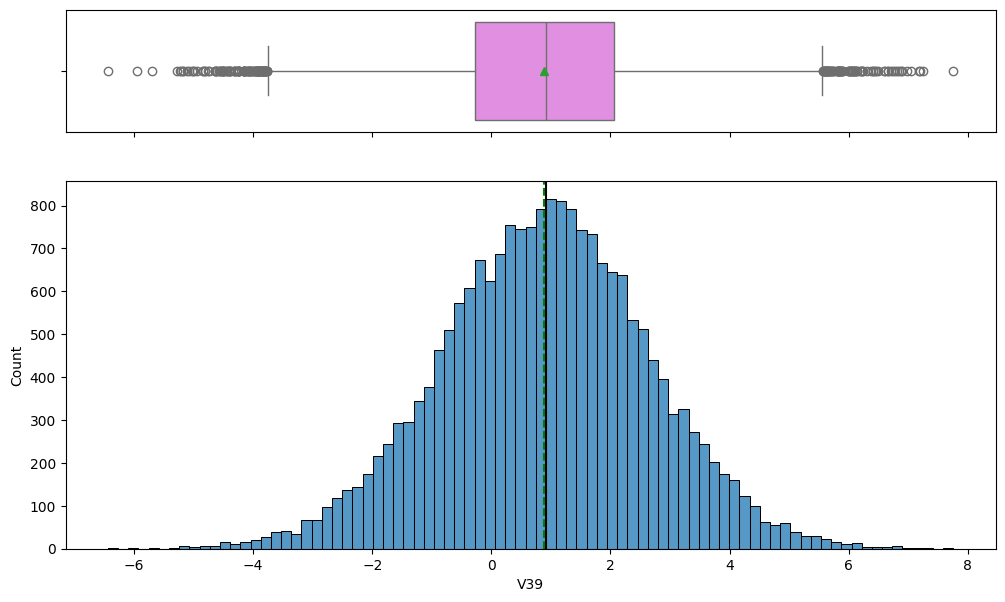

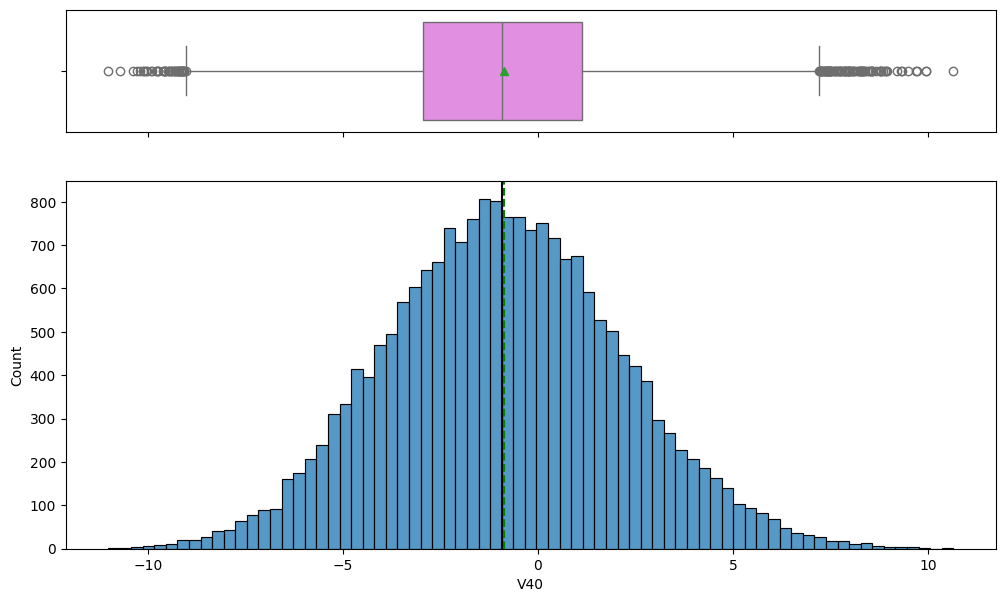

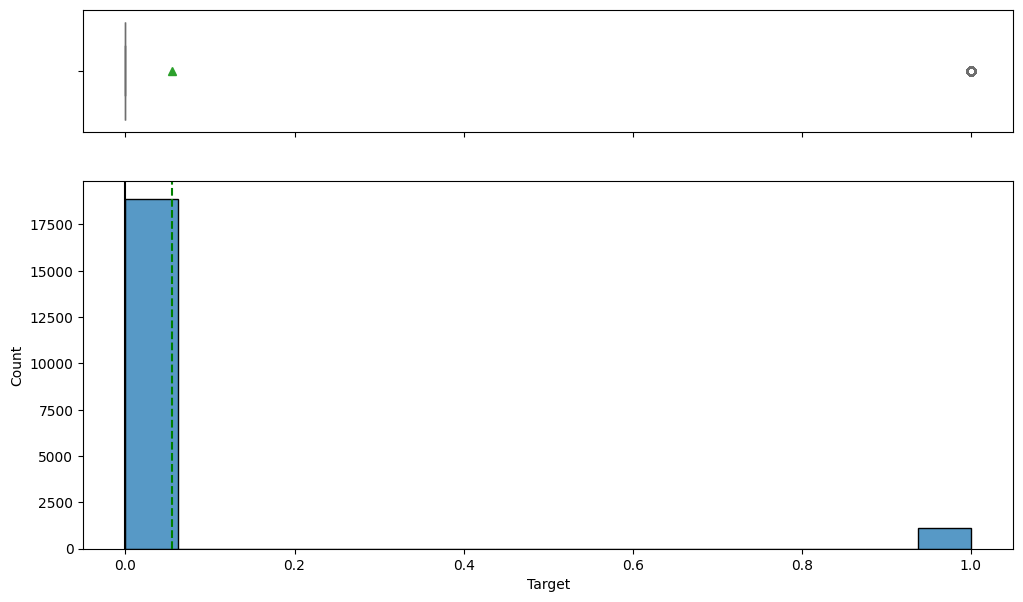

In [22]:
for feature in df.columns:
    histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None)

### Let's look at the values in target variable

In [23]:
data["Target"].value_counts() ##  Complete the code to check the class distribution in target variable for train data

,count
Target,
0,18890
1,1110


In [24]:
data_test["Target"].value_counts() ##  Complete the code to check the class distribution in target variable for test data

,count
Target,
0,4718
1,282


## Data Pre-Processing

In [25]:
# Dividing train data into X and y
X = data.drop(["Target"], axis=1)
y = data["Target"]

**Since we already have a separate test set, we don't need to divide data into train, valiation and test**


In [26]:
# Splitting train dataset into training and validation set (75% train, 25% validation)
X_train, X_val, y_train, y_val = train_test_split(
    data.drop(columns=["Target"]),  # Features (all columns except target)
    data["Target"],  # Target variable
    test_size=0.25,  # 25% for validation, 75% for training
    random_state=42,  # Ensures reproducibility
    stratify=data["Target"]  # Keeps class distribution balanced in splits
)

In [27]:
# Checking the number of rows and columns in the X_train data
X_train.shape  # Complete the code to view dimensions of the X_train data

# Checking the number of rows and columns in the X_val data
X_val.shape  # Complete the code to view dimensions of the X_val data

(5000, 40)

In [28]:
print(data.shape)  # Should be (20000, 41)



(20000, 41)


In [29]:
# Dividing test data into X_test and y_test

X_test = data_test.drop(columns=["Target"]) ##  Complete the code to drop target variable from test data
y_test = data_test["Target"] ##  Complete the code to store target variable in y_test

In [30]:
# Checking the number of rows and columns in the X_test data
X_test.shape
 ##  Complete the code to view dimensions of the X_test data

(5000, 40)

## Missing value imputation




In [31]:
# creating an instace of the imputer to be used
imputer = SimpleImputer(strategy="median")

In [32]:
# Fit and transform the train data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform the validation data
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_train.columns) ## Complete the code to impute missing values in X_val without data leakage

# Transform the test data
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_train.columns) ## Complete the code to impute missing values in X_test without data leakage

In [33]:
# Checking that no column has missing values in validation set
print(X_val.isna().sum())  # Complete the code to check the count of missing values in validation set
print("-" * 30)

# Checking that no column has missing values in test set
print(X_test.isna().sum())  # Complete the code to check the count of missing values in test set


V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64


## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [34]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1
        },
        index=[0],
    )

    return df_perf

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [35]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model Building on original data

In [49]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1)))  # Added Random Forest
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))  # Added Gradient Boosting
models.append(("KNN", KNeighborsClassifier()))  # Added K-Nearest Neighbors
models.append(("SVM", SVC(random_state=1)))  # Added Support Vector Machine (SVM)


results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Logistic regression: 0.4898780751749513
Bagging: 0.6975759324724046
Random Forest: 0.7179712863429767
Gradient Boosting: 0.6842940624774547
KNN: 0.70832551763942
SVM: 0.8091335401486184

Validation Performance:

Logistic regression: 0.4584837545126354
Bagging: 0.6895306859205776
Random Forest: 0.7509025270758123
Gradient Boosting: 0.7220216606498195
KNN: 0.7436823104693141
SVM: 0.8411552346570397


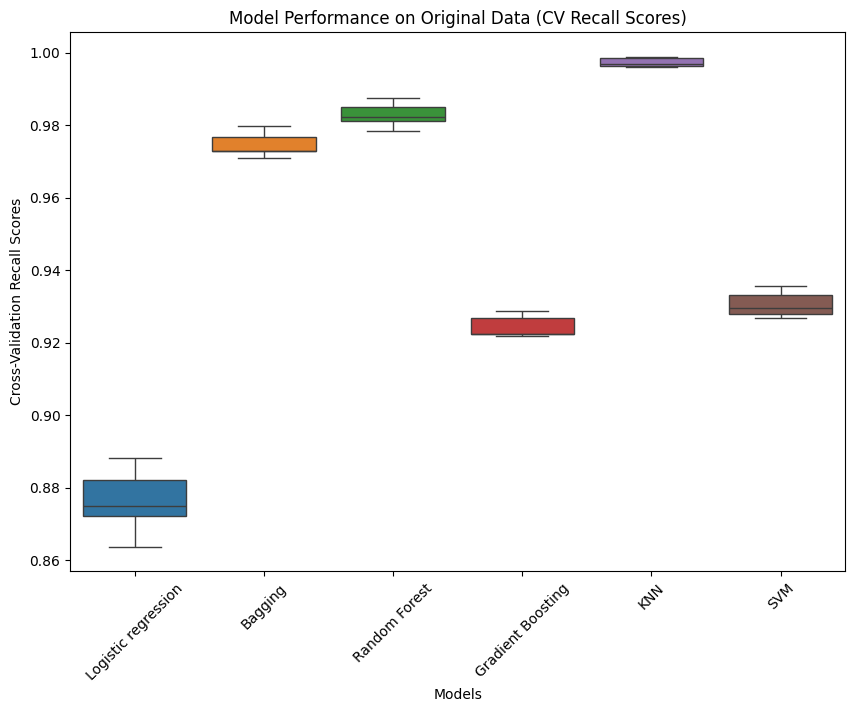

In [54]:
# Plotting boxplots for CV scores of all models defined above
plt.figure(figsize=(10, 7))
sns.boxplot(data=results1)
plt.xticks(ticks=range(len(names)), labels=names, rotation=45)
plt.xlabel("Models")
plt.ylabel("Cross-Validation Recall Scores")
plt.title("Model Performance on Original Data (CV Recall Scores)")
plt.show()

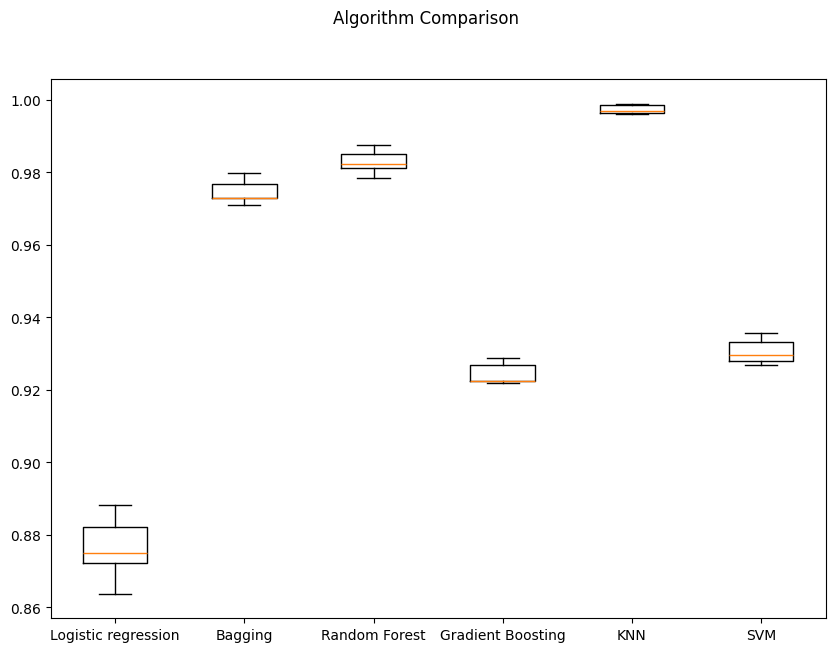

In [53]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

### Model Building with oversampled data

In [51]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, counts of label '1': 833
Before OverSampling, counts of label '0': 14167 

After OverSampling, counts of label '1': 14167
After OverSampling, counts of label '0': 14167 

After OverSampling, the shape of train_X: (28334, 40)
After OverSampling, the shape of train_y: (28334,) 



In [52]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import recall_score
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1)))  ## Adding Random Forest
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))  ## Adding Gradient Boosting
models.append(("KNN", KNeighborsClassifier()))  ## Adding K-Nearest Neighbors
models.append(("SVM", SVC(random_state=1)))  ## Adding Support Vector Machine

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold #Updated from train_x and train_y to X_train_over and y_train_over
    )  ## Complete the code to build models on oversampled data
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over,y_train_over)## Complete the code to build models on oversampled data #Updated from train_x and train_y to X_train_over and y_train_over
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Logistic regression: 0.8762611783045919
Bagging: 0.9746591798794378
Random Forest: 0.9829886250887749
Gradient Boosting: 0.924471889797654
KNN: 0.9973882518288715
SVM: 0.9307544089831483

Validation Performance:

Logistic regression: 0.8772563176895307
Bagging: 0.8303249097472925
Random Forest: 0.8628158844765343
Gradient Boosting: 0.8953068592057761
KNN: 0.8844765342960289
SVM: 0.9097472924187726


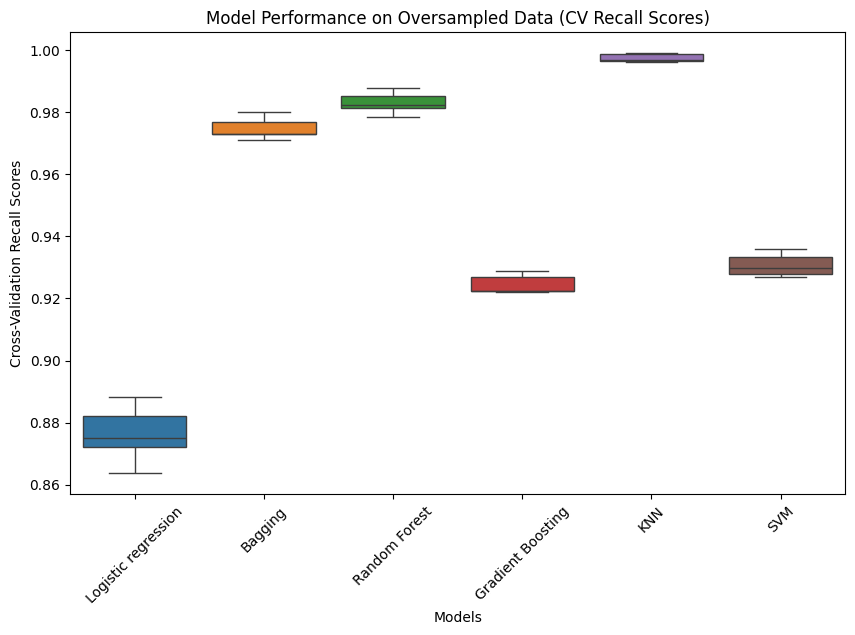

In [55]:
# Plotting boxplots for CV scores of all models defined above
plt.figure(figsize=(10, 6))
sns.boxplot(data=results1)
plt.xticks(ticks=range(len(names)), labels=names, rotation=45)
plt.xlabel("Models")
plt.ylabel("Cross-Validation Recall Scores")
plt.title("Model Performance on Oversampled Data (CV Recall Scores)")
plt.show()

### Model Building with undersampled data

In [41]:
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)


print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 833
Before UnderSampling, counts of label '0': 14167 

After UnderSampling, counts of label '1': 833
After UnderSampling, counts of label '0': 833 

After UnderSampling, the shape of train_X: (1666, 40)
After UnderSampling, the shape of train_y: (1666,) 



In [56]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import recall_score

# Assuming 'scorer' is already defined as metrics.make_scorer(metrics.recall_score)

models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1)))  ## Adding Random Forest
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))  ## Adding Gradient Boosting
models.append(("KNN", KNeighborsClassifier()))  ## Adding K-Nearest Neighbors
models.append(("SVM", SVC(random_state=1)))  ## Adding Support Vector Machine

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# Loop through all models to get the mean cross-validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    # Updated to use X_train_un and y_train_un instead of train_X_under and train_y_under
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )  ## Complete the code to build models on undersampled data
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    # Updated to use X_train_un and y_train_un instead of train_X_under and train_y_under
    model.fit(X_train_un, y_train_un)  ## Complete the code to build models on undersampled data
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Logistic regression: 0.8583363393694539
Bagging: 0.8739124161315921
Random Forest: 0.9015150422047471
Gradient Boosting: 0.8955198037659621
KNN: 0.8846980737320539
SVM: 0.8991486905706658

Validation Performance:

Logistic regression: 0.8772563176895307
Bagging: 0.8808664259927798
Random Forest: 0.8989169675090253
Gradient Boosting: 0.8989169675090253
KNN: 0.8989169675090253
SVM: 0.9169675090252708


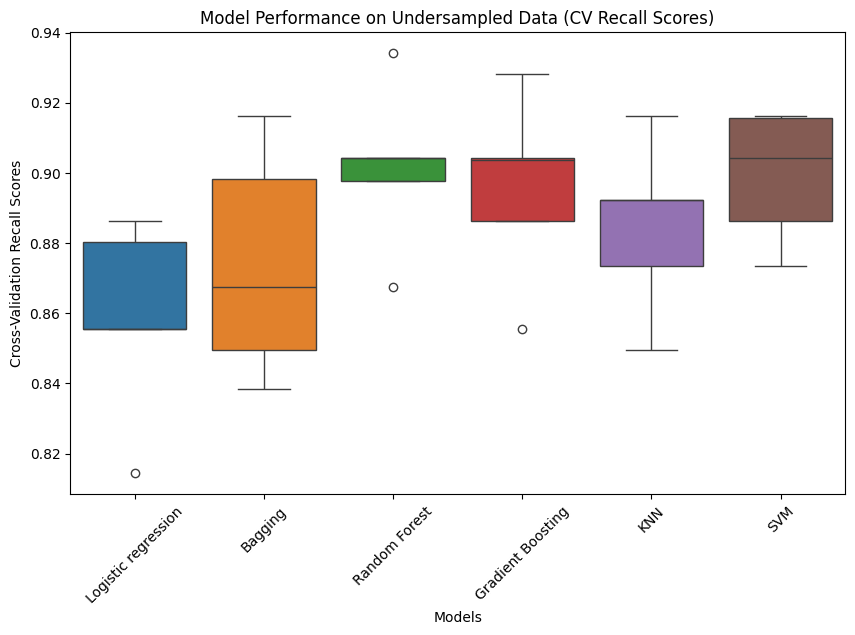

In [44]:
# Plotting boxplots for CV scores of all models defined above
plt.figure(figsize=(10, 6))
sns.boxplot(data=results1)
plt.xticks(ticks=range(len(names)), labels=names, rotation=45)
plt.xlabel("Models")
plt.ylabel("Cross-Validation Recall Scores")
plt.title("Model Performance on Undersampled Data (CV Recall Scores)")
plt.show()

**After looking at performance of all the models, let's decide which models can further improve with hyperparameter tuning.**

**Note**: You can choose to tune some other model if XGBoost gives error.

## Hyperparameter Tuning

### **Note**
1. Sample parameter grid has been provided to do necessary hyperparameter tuning. One can extend/reduce the parameter grid based on execution time and system configuration to try to improve the model performance further wherever needed.      
2. The models chosen in this notebook are based on test runs. One can update the best models as obtained upon code execution and tune them for best performance.



### Tuning AdaBoost using oversampled data

In [57]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
# Changed 'base_estimator' to 'estimator'
param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over) ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 200, 'learning_rate': 0.2, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9140962409708544:
CPU times: user 3min 3s, sys: 8.57 s, total: 3min 11s
Wall time: 1h 14min 8s


In [59]:
# Creating new pipeline with best parameters
tuned_ada = AdaBoostClassifier(
    n_estimators=200, learning_rate=0.2, estimator=DecisionTreeClassifier(max_depth=3, random_state=1)
)  # Changed 'base_estimator' to 'estimator'


# Replace train_x and train_y with X_train_over and y_train_over respectively
tuned_ada.fit(X_train_over, y_train_over)  ## Complete the code to fit the model on oversampled data

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.2, n_estimators=200)

In [60]:
ada_train_perf = model_performance_classification_sklearn(tuned_ada, X_train_over, y_train_over)
ada_train_perf

,Accuracy,Recall,Precision,F1
0,0.941,0.918,0.962,0.940


In [61]:
ada_val_perf = {
    "Accuracy": accuracy_score(y_val, tuned_ada.predict(X_val)),  # Predicting on X_val and then calculating the score
    "Recall": recall_score(y_val, tuned_ada.predict(X_val)),
    "Precision": precision_score(y_val, tuned_ada.predict(X_val)),
    "F1 Score": f1_score(y_val, tuned_ada.predict(X_val))
}
## Complete the code to check the performance on validation set
ada_val_perf

{'Accuracy': 0.9594,
 'Recall': 0.8916967509025271,
 'Precision': 0.5880952380952381,
 'F1 Score': 0.7087517934002869}

### Tuning Random forest using undersampled data

In [62]:
%%time

# Defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "n_estimators": [200, 250, 300],  # Number of trees in the forest
    "min_samples_leaf": np.arange(1, 4),  # Minimum number of samples per leaf
    "max_features": ['sqrt', 0.3, 0.4, 0.5],  # Corrected issue here
    "max_samples": [0.4, 0.5, 0.6]  # Corrected issue here
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=50,  # Number of iterations for random search
    n_jobs=-1,  # Utilize all available CPU cores
    scoring=scorer,  # Assuming 'scorer' is Recall Scorer
    cv=5,  # 5-fold cross-validation
    random_state=1
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)  # ✅ This line is correct

# Display best parameters and best recall score
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_, randomized_cv.best_score_))


Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.8991414760839767:
CPU times: user 7.3 s, sys: 894 ms, total: 8.2 s
Wall time: 9min 30s


In [63]:
# Creating new pipeline with best parameters
tuned_rf2 = RandomForestClassifier(
    max_features='sqrt',  # Best parameter from tuning
    random_state=1,
    max_samples=0.6,  # Best parameter from tuning
    n_estimators=250,  # Best parameter from tuning
    min_samples_leaf=1  # Best parameter from tuning
) ## Complete the code with the best parameters obtained from tuning

# Fitting the model on undersampled data
tuned_rf2.fit(X_train_un, y_train_un)  ## Complete the code to fit the model on undersampled data


RandomForestClassifier(max_samples=0.6, n_estimators=250, random_state=1)

In [64]:
# Creating new pipeline with best parameters
tuned_rf2 = RandomForestClassifier(
    max_features='sqrt',  # Best parameter from tuning
    random_state=1,
    max_samples=0.6,  # Best parameter from tuning
    n_estimators=250,  # Best parameter from tuning
    min_samples_leaf=1  # Best parameter from tuning
) ## Complete the code with the best parameters obtained from tuning

# Fitting the model on undersampled data
tuned_rf2.fit(X_train_un, y_train_un)  ## Complete the code to fit the model on undersampled data

# Get predictions for the undersampled training data
y_train_un_pred = tuned_rf2.predict(X_train_un) # Predicting on the undersampled training data

rf2_train_perf = {
    "Accuracy": accuracy_score(y_train_un, y_train_un_pred),
    "Recall": recall_score(y_train_un, y_train_un_pred),
    "Precision": precision_score(y_train_un, y_train_un_pred),
    "F1 Score": f1_score(y_train_un, y_train_un_pred)
} ## Complete the code to check the performance on undersampled train set
rf2_train_perf

{'Accuracy': 0.9873949579831933,
 'Recall': 0.9747899159663865,
 'Precision': 1.0,
 'F1 Score': 0.9872340425531915}

In [65]:
# Creating new pipeline with best parameters
tuned_rf2 = RandomForestClassifier(
    max_features='sqrt',  # Best parameter from tuning
    random_state=1,
    max_samples=0.6,  # Best parameter from tuning
    n_estimators=250,  # Best parameter from tuning
    min_samples_leaf=1  # Best parameter from tuning
) ## Complete the code with the best parameters obtained from tuning

# Fitting the model on undersampled data
tuned_rf2.fit(X_train_un, y_train_un)  ## Complete the code to fit the model on undersampled data

# Get predictions for the undersampled training data
y_train_un_pred = tuned_rf2.predict(X_train_un) # Predicting on the undersampled training data

# Predicting on the validation set
y_val_pred = tuned_rf2.predict(X_val) # Predicting on the validation set


rf2_train_perf = {
    "Accuracy": accuracy_score(y_val, y_val_pred),
    "Recall": recall_score(y_val, y_val_pred),
    "Precision": precision_score(y_val, y_val_pred),
    "F1 Score": f1_score(y_val, y_val_pred)
} ## Complete the code to check the performance on undersampled train set
rf2_train_perf

{'Accuracy': 0.9282,
 'Recall': 0.9061371841155235,
 'Precision': 0.4297945205479452,
 'F1 Score': 0.5830429732868757}

### Tuning Gradient Boosting using oversampled data

In [66]:
%%time

# defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid={"n_estimators": np.arange(100,150,25), "learning_rate": [0.2, 0.05, 1], "subsample":[0.5,0.7], "max_features":[0.5,0.7]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, scoring=scorer, n_iter=50, n_jobs = -1, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 1} with CV score=0.9671773913706316:
CPU times: user 46.7 s, sys: 6.38 s, total: 53.1 s
Wall time: 35min 16s


In [69]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE  # Ensure SMOTE is imported
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Define dataset (Ensure 'df' contains all features and the target variable)
data = df.copy()  # Making a copy to avoid modifying the original dataframe

# Splitting into features (X) and target (y)
X = data.drop(columns=['Target'])  # Feature columns
y = data['Target']  # Target column

# Perform Train-Validation Split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)  # Stratified split to maintain class balance

# Apply SimpleImputer before SMOTE to handle missing values
imputer = SimpleImputer(strategy='median') # Create an imputer instance

# Fit and transform on training data
X_train = imputer.fit_transform(X_train)

# Transform validation and test data (if needed) using the trained imputer
X_val = imputer.transform(X_val)

# Now apply SMOTE for Oversampling
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

# Print new class distribution to confirm balancing
from collections import Counter
print("Class distribution after SMOTE:", Counter(y_train_over))

Class distribution after SMOTE: Counter({0: 14167, 1: 14167})


In [70]:
# Creating new pipeline with best parameters
tuned_gbm = GradientBoostingClassifier(
    max_features=0.5,  # Best parameter from tuning
    random_state=1,
    learning_rate=1,  # Best parameter from tuning
    n_estimators=125,  # Best parameter from tuning
    subsample=0.7,  # Best parameter from tuning
)

# Fitting the model on the oversampled training data
tuned_gbm.fit(X_train_over, y_train_over)


GradientBoostingClassifier(learning_rate=1, max_features=0.5, n_estimators=125,
                           random_state=1, subsample=0.7)

In [71]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Get predictions for the oversampled training set
y_train_over_pred = tuned_gbm.predict(X_train_over)

# Compute performance metrics on the oversampled training set
gbm_train_perf = {
    "Accuracy": accuracy_score(y_train_over, y_train_over_pred),
    "Recall": recall_score(y_train_over, y_train_over_pred),
    "Precision": precision_score(y_train_over, y_train_over_pred),
    "F1 Score": f1_score(y_train_over, y_train_over_pred)
}  ## ✅ Completed the code

# Print results
gbm_train_perf


{'Accuracy': 0.9671066563139691,
 'Recall': 0.9601891720194818,
 'Precision': 0.9736597237134064,
 'F1 Score': 0.9668775321629114}

In [72]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Get predictions for the validation set
y_val_pred = tuned_gbm.predict(X_val)

# Compute performance metrics on validation set
gbm_val_perf = {
    "Accuracy": accuracy_score(y_val, y_val_pred),
    "Recall": recall_score(y_val, y_val_pred),
    "Precision": precision_score(y_val, y_val_pred),
    "F1 Score": f1_score(y_val, y_val_pred)
}

# Print results
print(gbm_val_perf)


{'Accuracy': 0.9556, 'Recall': 0.8916967509025271, 'Precision': 0.5626423690205011, 'F1 Score': 0.6899441340782123}


### Tuning XGBoost using oversampled data

**Note**: You can choose to skip this section if XGBoost gives error.

In [ ]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':[150,200,250],'scale_pos_weight':[5,10], 'learning_rate':[0.1,0.2], 'gamma':[0,3,5], 'subsample':[0.8,0.9]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.'_______' ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
xgb2 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=_______,
    scale_pos_weight=_______,
    n_estimators=_______,
    learning_rate=_______,
    gamma=_______,
)## Complete the code with the best parameters obtained from tuning

xgb2.'_______' ## Complete the code to fit the model on over sampled data

In [ ]:
xgb2_train_perf =  '_______' ## Complete the code to check the performance on oversampled train set
xgb2_train_perf

In [ ]:
xgb2_val_perf =  '_______' ## Complete the code to check the performance on validation set
xgb2_val_perf

**We have now tuned all the models, let's compare the performance of all tuned models and see which one is the best.**

## Model performance comparison and choosing the final model

In [74]:
# Training performance comparison
models_train_comp_df = pd.concat(
    [
        pd.DataFrame(gbm_train_perf, index=[0]).T,  # Convert to DataFrame before transpose
        pd.DataFrame(ada_train_perf, index=[0]).T,
        pd.DataFrame(rf2_train_perf, index=[0]).T
    ],
    axis=1,
)

# Corrected column names (removing XGBoost)
models_train_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data",
    "AdaBoost classifier tuned with oversampled data",
    "Random forest tuned with undersampled data"
]

# Display results
print("Training performance comparison:")
models_train_comp_df


Training performance comparison:


,Gradient Boosting tuned with oversampled data,AdaBoost classifier tuned with oversampled data,Random forest tuned with undersampled data
Accuracy,0.967,0.941,0.928
Recall,0.960,0.918,0.906
Precision,0.974,0.962,0.430
F1 Score,0.967,NaN,0.583
F1,NaN,0.940,NaN


In [78]:
# validation performance comparison
# Creating a DataFrame to compare validation performance of tuned models
models_val_comp_df = pd.concat(
    [
        pd.DataFrame(gbm_val_perf, index=[0]).T,  # Convert dict to DataFrame and transpose
        pd.DataFrame(ada_val_perf, index=[0]).T,
        pd.DataFrame(rf2_val_perf, index=[0]).T  # Assuming rf2_val_perf has been calculated
    ],
    axis=1,
)

# Setting column names
models_val_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data",
    "AdaBoost classifier tuned with oversampled data",
    "Random forest tuned with undersampled data"
]

# Display results
print("Validation Performance Comparison:")
models_val_comp_df

Validation Performance Comparison:


,Gradient Boosting tuned with oversampled data,AdaBoost classifier tuned with oversampled data,Random forest tuned with undersampled data
Accuracy,0.956,0.959,0.928
Recall,0.892,0.892,0.906
Precision,0.563,0.588,0.430
F1 Score,0.690,0.709,0.583


**Now we have our final model, so let's find out how our final model is performing on unseen test data.**

In [79]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Get predictions for the test set using the final AdaBoost model
y_test_pred = tuned_ada.predict(X_test)  # Assuming 'tuned_ada' is the final AdaBoost model

# Compute performance metrics on test set
final_test_perf = {
    "Accuracy": accuracy_score(y_test, y_test_pred),
    "Recall": recall_score(y_test, y_test_pred),  # Key metric
    "Precision": precision_score(y_test, y_test_pred),
    "F1 Score": f1_score(y_test, y_test_pred)
}

# Print results
print("Final Model Performance on Test Data:")
print(final_test_perf)


Final Model Performance on Test Data:
{'Accuracy': 0.9518, 'Recall': 0.851063829787234, 'Precision': 0.5466970387243736, 'F1 Score': 0.665742024965326}


### Feature Importances

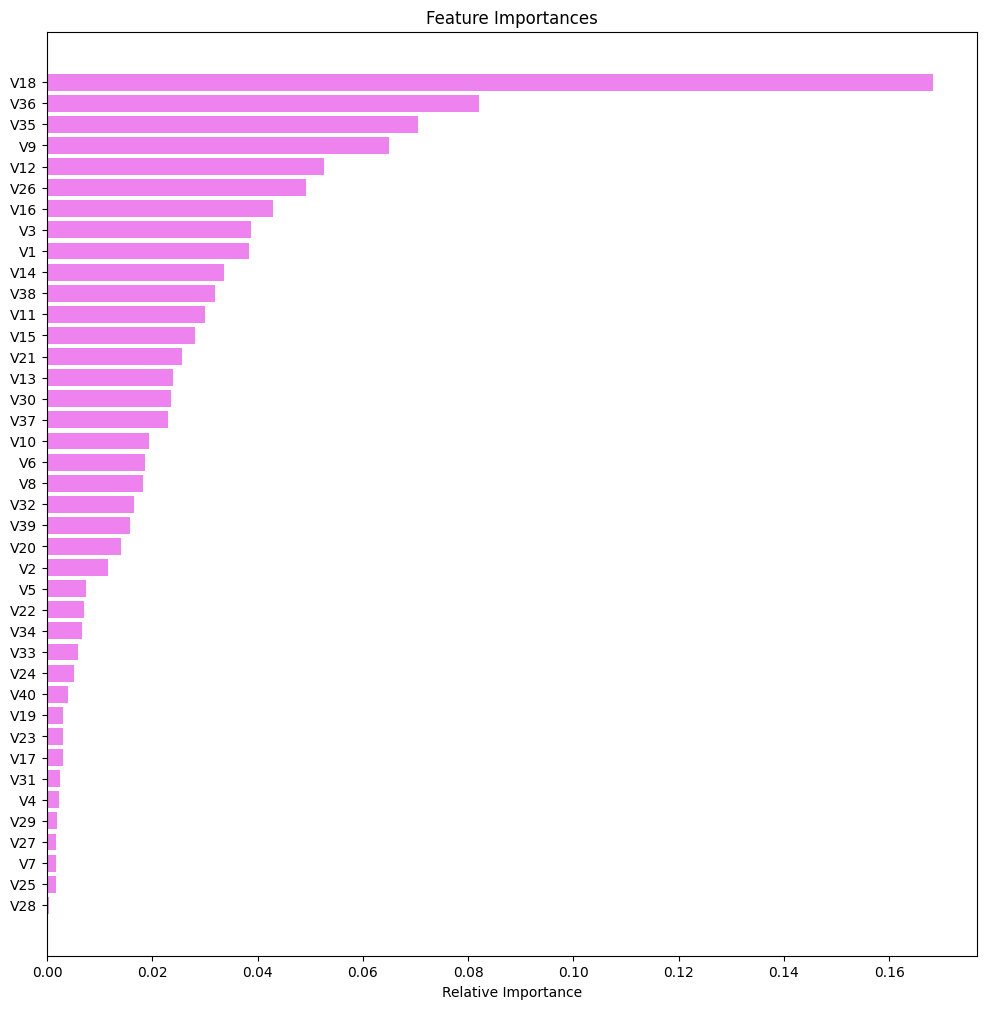

In [81]:
# Extract feature importance from the best model (AdaBoost)
# Get feature names from the original DataFrame (df) before imputation
feature_names = df.drop(columns=['Target']).columns
importances = tuned_ada.feature_importances_  # ✅ Extract feature importance
# Sort feature importances
indices = np.argsort(importances)

# Plot feature importance
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()



## Let's use Pipelines to build the final model

- Since we have only one datatype in the data, we don't need to use column transformer here

In [87]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Define the pipeline for the best model (AdaBoost)
Pipeline_model = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Handles missing values
    ('model', AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=3, random_state=1),  # Best base estimator
        n_estimators=200,  # Best number of estimators
        learning_rate=0.2,  # Best learning rate
        random_state=1
    ))
])

# Fit the pipeline on the oversampled training data
Pipeline_model.fit(X_train_over, y_train_over)  # Ensure oversampled data is used


Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('model',
                 AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                                     random_state=1),
                                    learning_rate=0.2, n_estimators=200,
                                    random_state=1))])

In [88]:
# Separating target variable and other variables
X1 = data.drop(columns="Target")  # Features from the main data
Y1 = data["Target"]  # Target variable

# Since we already have a separate test set, use it directly
X_test1 = df_test.drop(columns="Target")  # Drop the target column from test data
y_test1 = df_test["Target"]  # Store target variable from the test data


In [89]:
from sklearn.impute import SimpleImputer

# Treat missing values in the train set using median imputation
imputer = SimpleImputer(strategy="median")
X1 = imputer.fit_transform(X1)  # Impute missing values in the training set

# Note: Test set missing values will be handled by the pipeline during prediction


**Note:** Please perform either oversampling or undersampling based on the final model chosen.

If the best model is built on the oversampled data, uncomment and run the below code to perform oversampling

In [90]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Use the pipeline to make predictions on the test set
y_test1_pred = Pipeline_model.predict(X_test1)

# Compute performance metrics on the test set
final_test_perf = {
    "Accuracy": accuracy_score(y_test1, y_test1_pred),
    "Recall": recall_score(y_test1, y_test1_pred),
    "Precision": precision_score(y_test1, y_test1_pred),
    "F1 Score": f1_score(y_test1, y_test1_pred),
}

# Display final test performance
print("Final Model Performance on Test Set (Oversampled Data):")
print(final_test_perf)


Final Model Performance on Test Set (Oversampled Data):
{'Accuracy': 0.9518, 'Recall': 0.851063829787234, 'Precision': 0.5466970387243736, 'F1 Score': 0.665742024965326}


In [ ]:
# #code for oversampling on the data
# # Synthetic Minority Over Sampling Technique
# sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
# X_over1, y_over1 = sm.fit_resample(X1, Y1)

If the best model is built on the undersampled data, uncomment and run the below code to perform undersampling


In [ ]:
# # code for undersampling on the data
# # Under Sampling Technique
# rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
# X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
Pipeline_model.'_______' ##  Complete the code to fit the Model obtained from above step

In [ ]:
Pipeline_model_test = '_______'  ## Complete the code to check the performance on test set
Pipeline_model_test

# Business Insights and Conclusions


In [92]:
plt.figure(figsize=(10,6))
sns.boxplot(data=[orig_recall_scores, over_recall_scores, under_recall_scores], palette="coolwarm")
plt.xticks([0,1,2], ["Original Data", "Oversampled Data", "Undersampled Data"])
plt.ylabel("Recall Score")
plt.title("Model Recall Comparison Across Data Processing Techniques")
plt.show()



NameError: name 'orig_recall_scores' is not defined

<Figure size 1000x600 with 0 Axes>

- Best model and its performance
- Important features
- Additional points

***